# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Loading the dataset

In [4]:
# read the data
data = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [5]:
# create a copy
df = data.copy()

In [6]:
# determine the shape
df.shape

(3454, 15)

In [7]:
# determine the non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [8]:
# determine the descriptive statistics for each variable
df.describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


In [9]:
# determine if there are duplicate values
df.duplicated().sum()

0

In [10]:
# determine how many missing values are in each variable
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [11]:
# this function provides a histogram and boxplot for variables passed through it
# This function comes from the MLS
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots
# This function comes mostly from the MLS

def labeled_countplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to create a labeled barplot
# This function is based on functions shows during the MLS

def labeled_barplot(data, numerical_feature, categorical_feature, perc = False):
    """
    Bar plot with count and percentage values

    data: dataframe
    numerical_feature: numerical variable (e.g., weight)
    categorical_feature: categorical variable (e.g., battery type)
    """

    plt.figure(figsize=(30, 12))
    ax = sns.barplot(
        data=data,
        x=categorical_feature,
        y=numerical_feature,
        palette="Paired",
    )

    total_counts = len(data)
    max_value = data[numerical_feature].max() * 1.1
    
    labels_list = []
    for label_value in data[categorical_feature]:
    
        if label_value not in labels_list:
            labels_list.append(label_value)   
    
 
    for i, p in enumerate(ax.patches):
        
        xlabel = labels_list[i]
        if perc == True:

            label = round((data[categorical_feature].value_counts()[xlabel]/total_counts) * 100 , 2)

        else:
            height = p.get_height()
            label = round(height,2)


        a = p.get_x() + p.get_width() / 2  # width of the plot
        b = p.get_height()  # height of the plot
        
        ax.annotate(
        label,
        (a, b),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
        )  # annotate the percentage

    plt.ylim(0, max_value)
    plt.xlabel(categorical_feature, fontsize=25)
    plt.ylabel(numerical_feature, fontsize=25)
    plt.xticks(rotation=90, fontsize=12)
    if perc == True:
        plt.title(f"Bar Plot: Percentage of {categorical_feature} by {numerical_feature}", fontsize=30)
    else:
        plt.title(f"Bar Plot: {categorical_feature} by {numerical_feature}", fontsize=30)
    plt.show()


## 1. What does the distribution of normalized used device prices look like?

In [17]:
# determine the descriptive statistics
df.normalized_new_price.describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

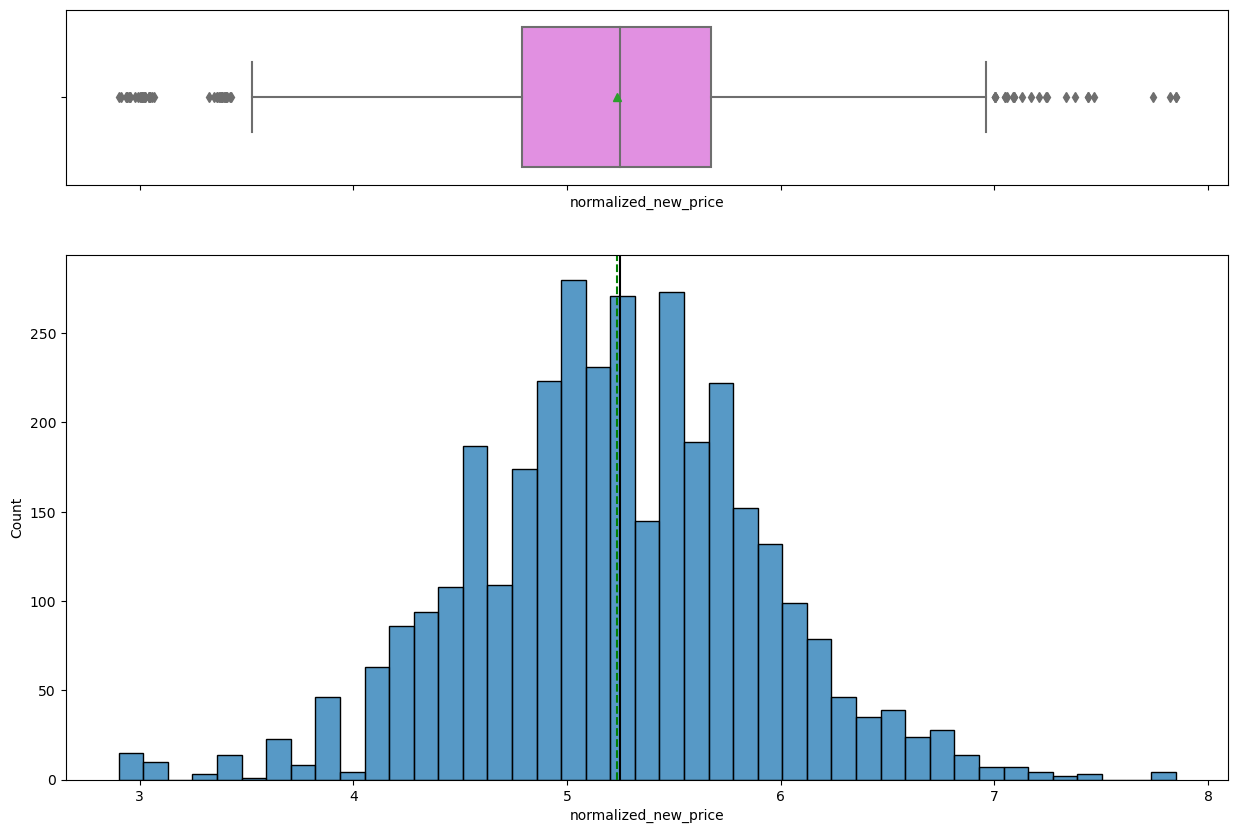

In [18]:
# run the hostogram/boxplot function on normalized_used_price
histogram_boxplot(df, 'normalized_new_price')

#### Observation: 

Visually, from the box plot and histogram, the normalized_new_price of phones seems to be a pretty normal distribution. The histogram possibly looks slightly bimodal due to the drop in count around the 5.4 mark. The boxplot and the .describe() function shows the mean and median to be very similar- 5.23 and 5.25, respectively. The boxplot also shows that there is a high number of outliers on both ends.

## 2. What percentage of the used device market is dominated by Android devices?

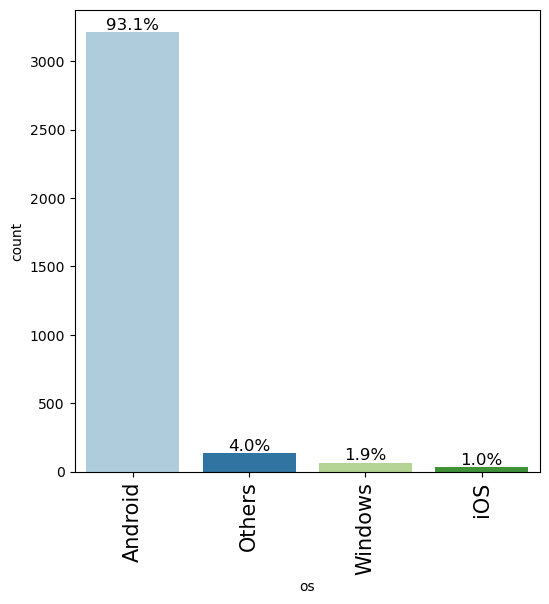

In [19]:
# run the countplot function on os
labeled_countplot(df, 'os', perc = True)

#### Observations:

There are far more Andriods than any other brand of device. The breakdown is Android (93.1%), Others (4.0%), Windows (1.9%), and ios (1.0%)

## 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

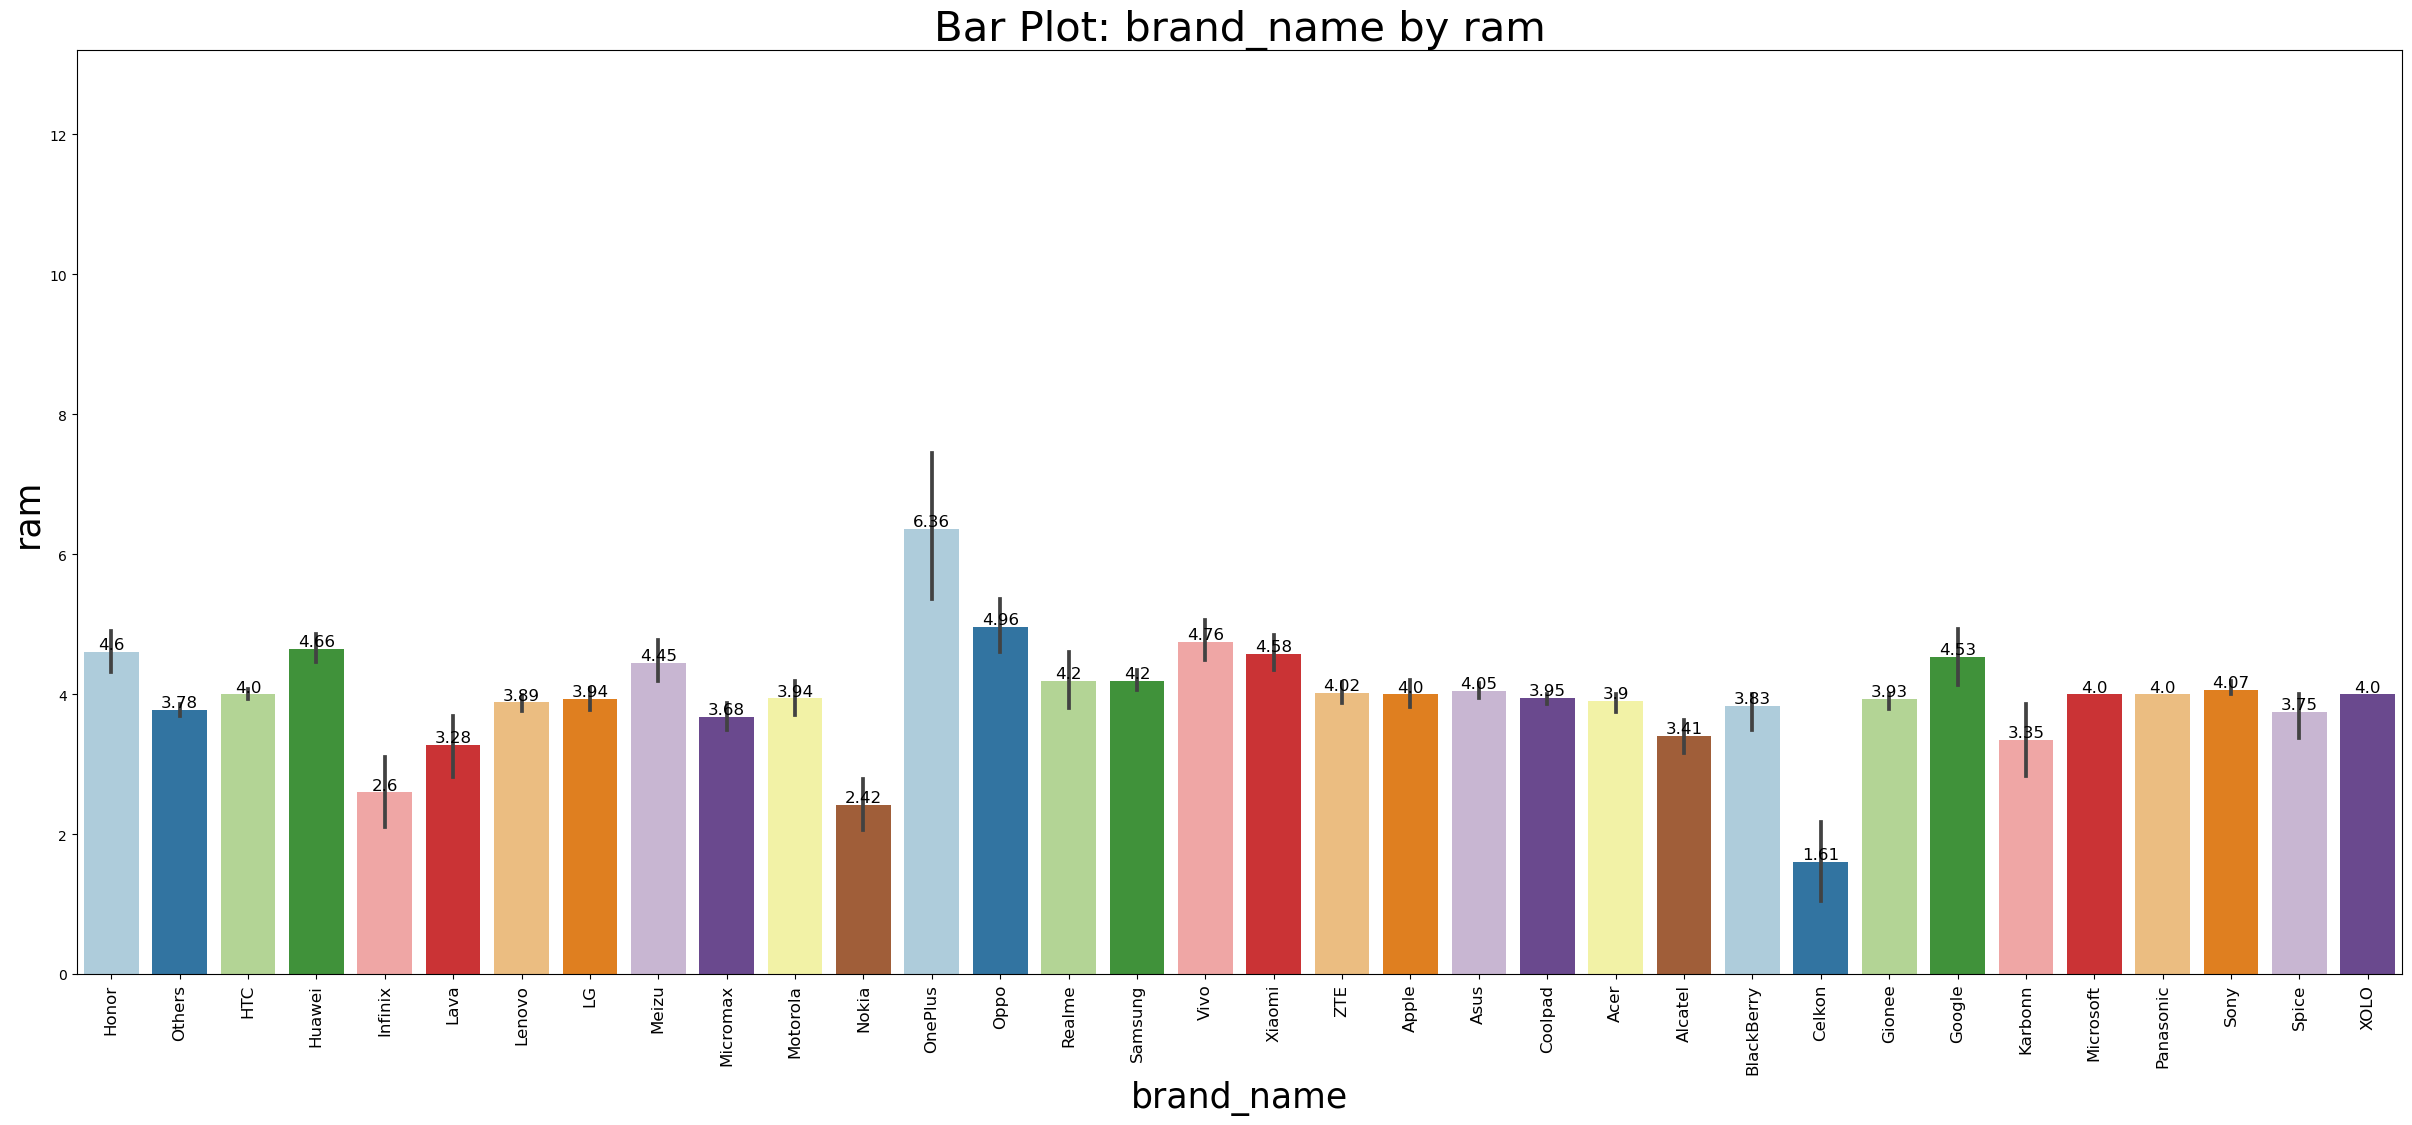

In [20]:
# run the barplot function on ram against brand name
labeled_barplot(df, 'ram', 'brand_name' )

#### Observations:

Many brand names share a common ram size, ~ 4 GB of ram. However, OnePlus has an average ram size of 6.36 GB of ram and Celkon has an average ram size of 1.61 GB of ram.

## 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [21]:
# determine the descriptive statistics
df['battery'].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

In [22]:
# filter the data set by battery > 4500
df_w = df[df['battery']>4500]

In [23]:
# determine shape of dataset
df_w.shape

(341, 15)

In [24]:
# create dataset of the filtered value counts of battery
value_counts = df_w['battery'].value_counts()

# Filter the DataFrame to keep only values appearing more than 10 times
filtered_df = df_w[df_w['battery'].isin(value_counts[value_counts > 1].index)]
# determine the number of unique values in the filtered dataframe
filtered_df['battery'].nunique()

44

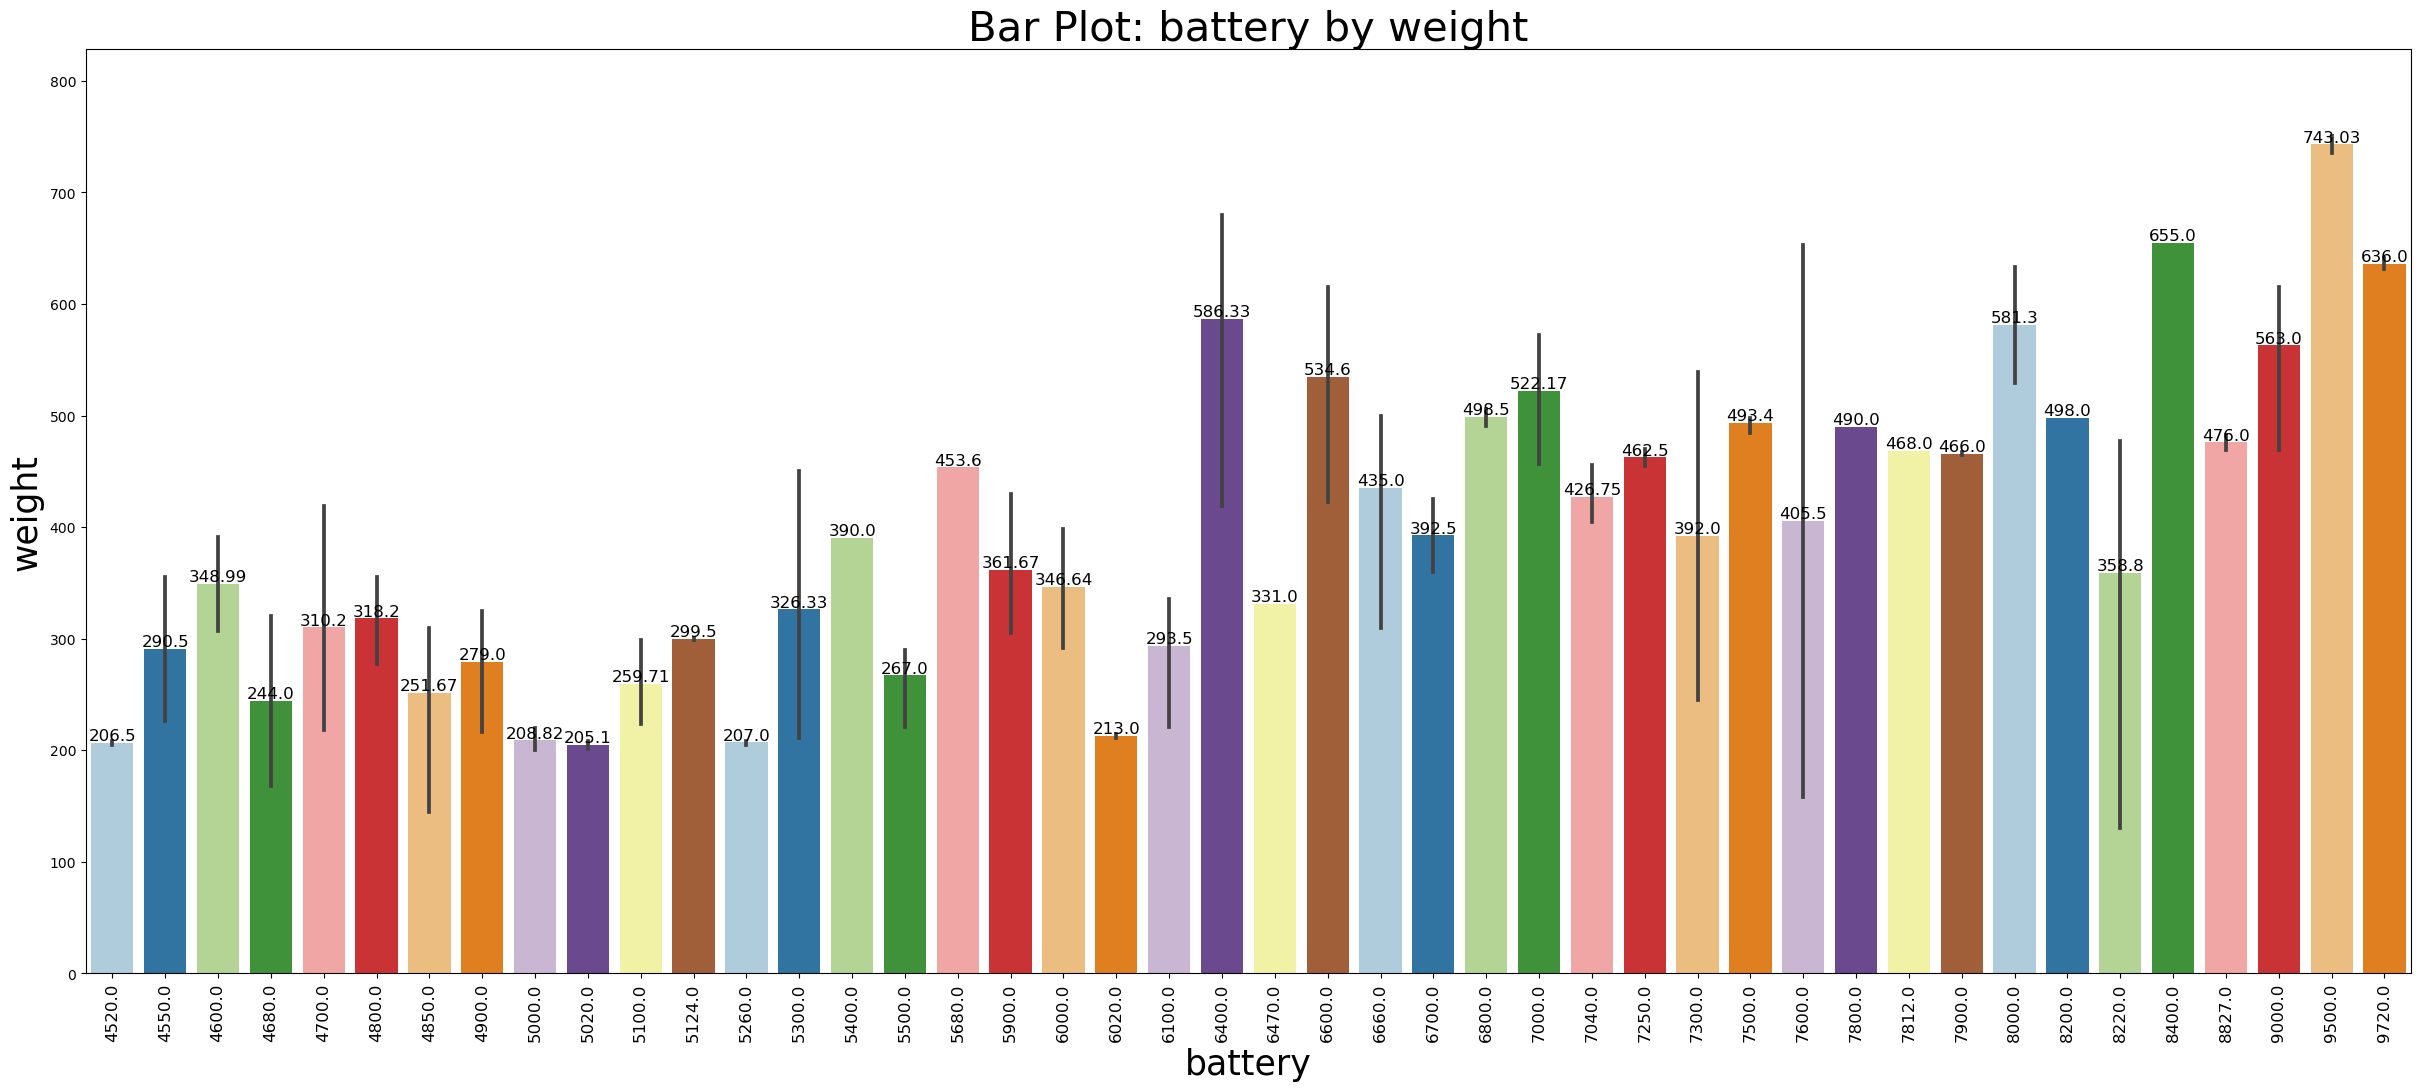

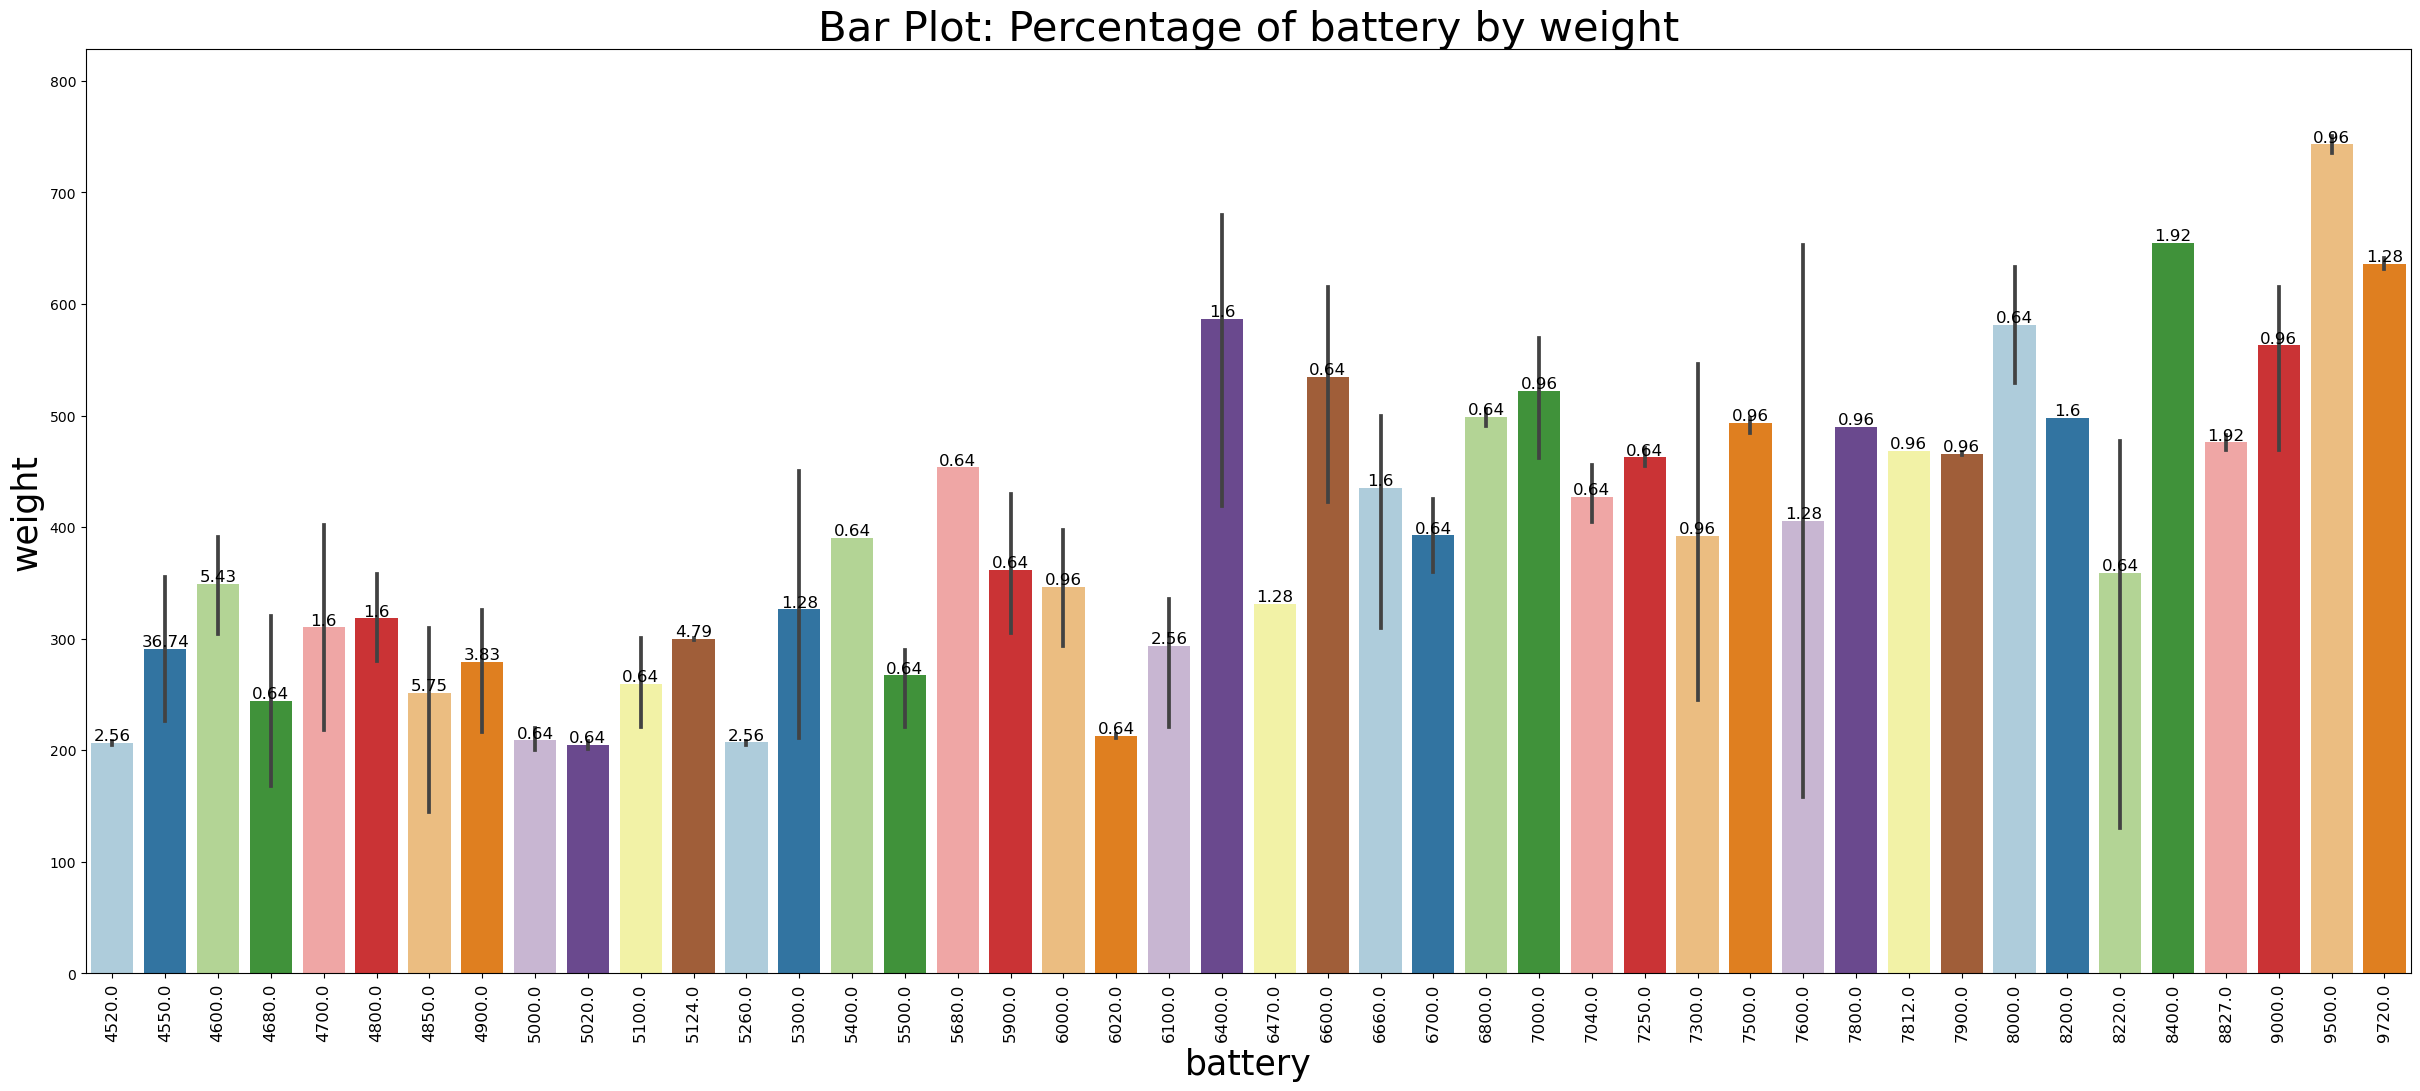

In [25]:
# run the barplot function on weight against battery
labeled_barplot(filtered_df, 'weight', 'battery')
labeled_barplot(filtered_df, 'weight', 'battery', perc = True)

## 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [26]:
# filter the dataframe by screen size > 6"
df_screen = df[df['screen_size'] >6]
print(df_screen['screen_size'].describe())

count    3362.000000
mean       13.946047
std         3.583129
min         6.680000
25%        12.700000
50%        12.830000
75%        15.370000
max        30.710000
Name: screen_size, dtype: float64


In [27]:
# create a dataframe of brand_name value counts
df_count = df['brand_name'].value_counts()
# create a dataframe of filtered brand_name value counts
df_screen_count = df_screen['brand_name'].value_counts()
# create a new dataframe and define the column names
result_df = pd.DataFrame(columns = ['Brand', 'Screen > 6"', 'Total Phones', 'Percentage'])
# iterate through each unique brand_name value in the filtered dataframe
for i in df_screen['brand_name'].unique():
    # get the percentage values
    percentage = (df_screen_count[i]/df_count[i]) * 100
    # create the row data
    row= {'Brand': i, 'Screen > 6"': df_screen_count[i], 
          'Total Phones': df_count[i], 'Percentage': round(percentage,2)}
    # concatonate the DataFrame
    result_df = pd.concat([result_df, pd.DataFrame([row])])

# set the rows in ascending order and drop the index
result_df = result_df.sort_values( by = 'Total Phones', ascending = False)
result_df = result_df.reset_index(drop = True)
# present the results 
result_df

,Brand,"Screen > 6""",Total Phones,Percentage
0,Others,479,502,95.42
1,Samsung,334,341,97.95
2,Huawei,251,251,100.00
3,LG,197,201,98.01
4,Lenovo,171,171,100.00
5,ZTE,140,140,100.00
6,Xiaomi,132,132,100.00
7,Oppo,129,129,100.00
8,Asus,122,122,100.00
9,Alcatel,115,121,95.04


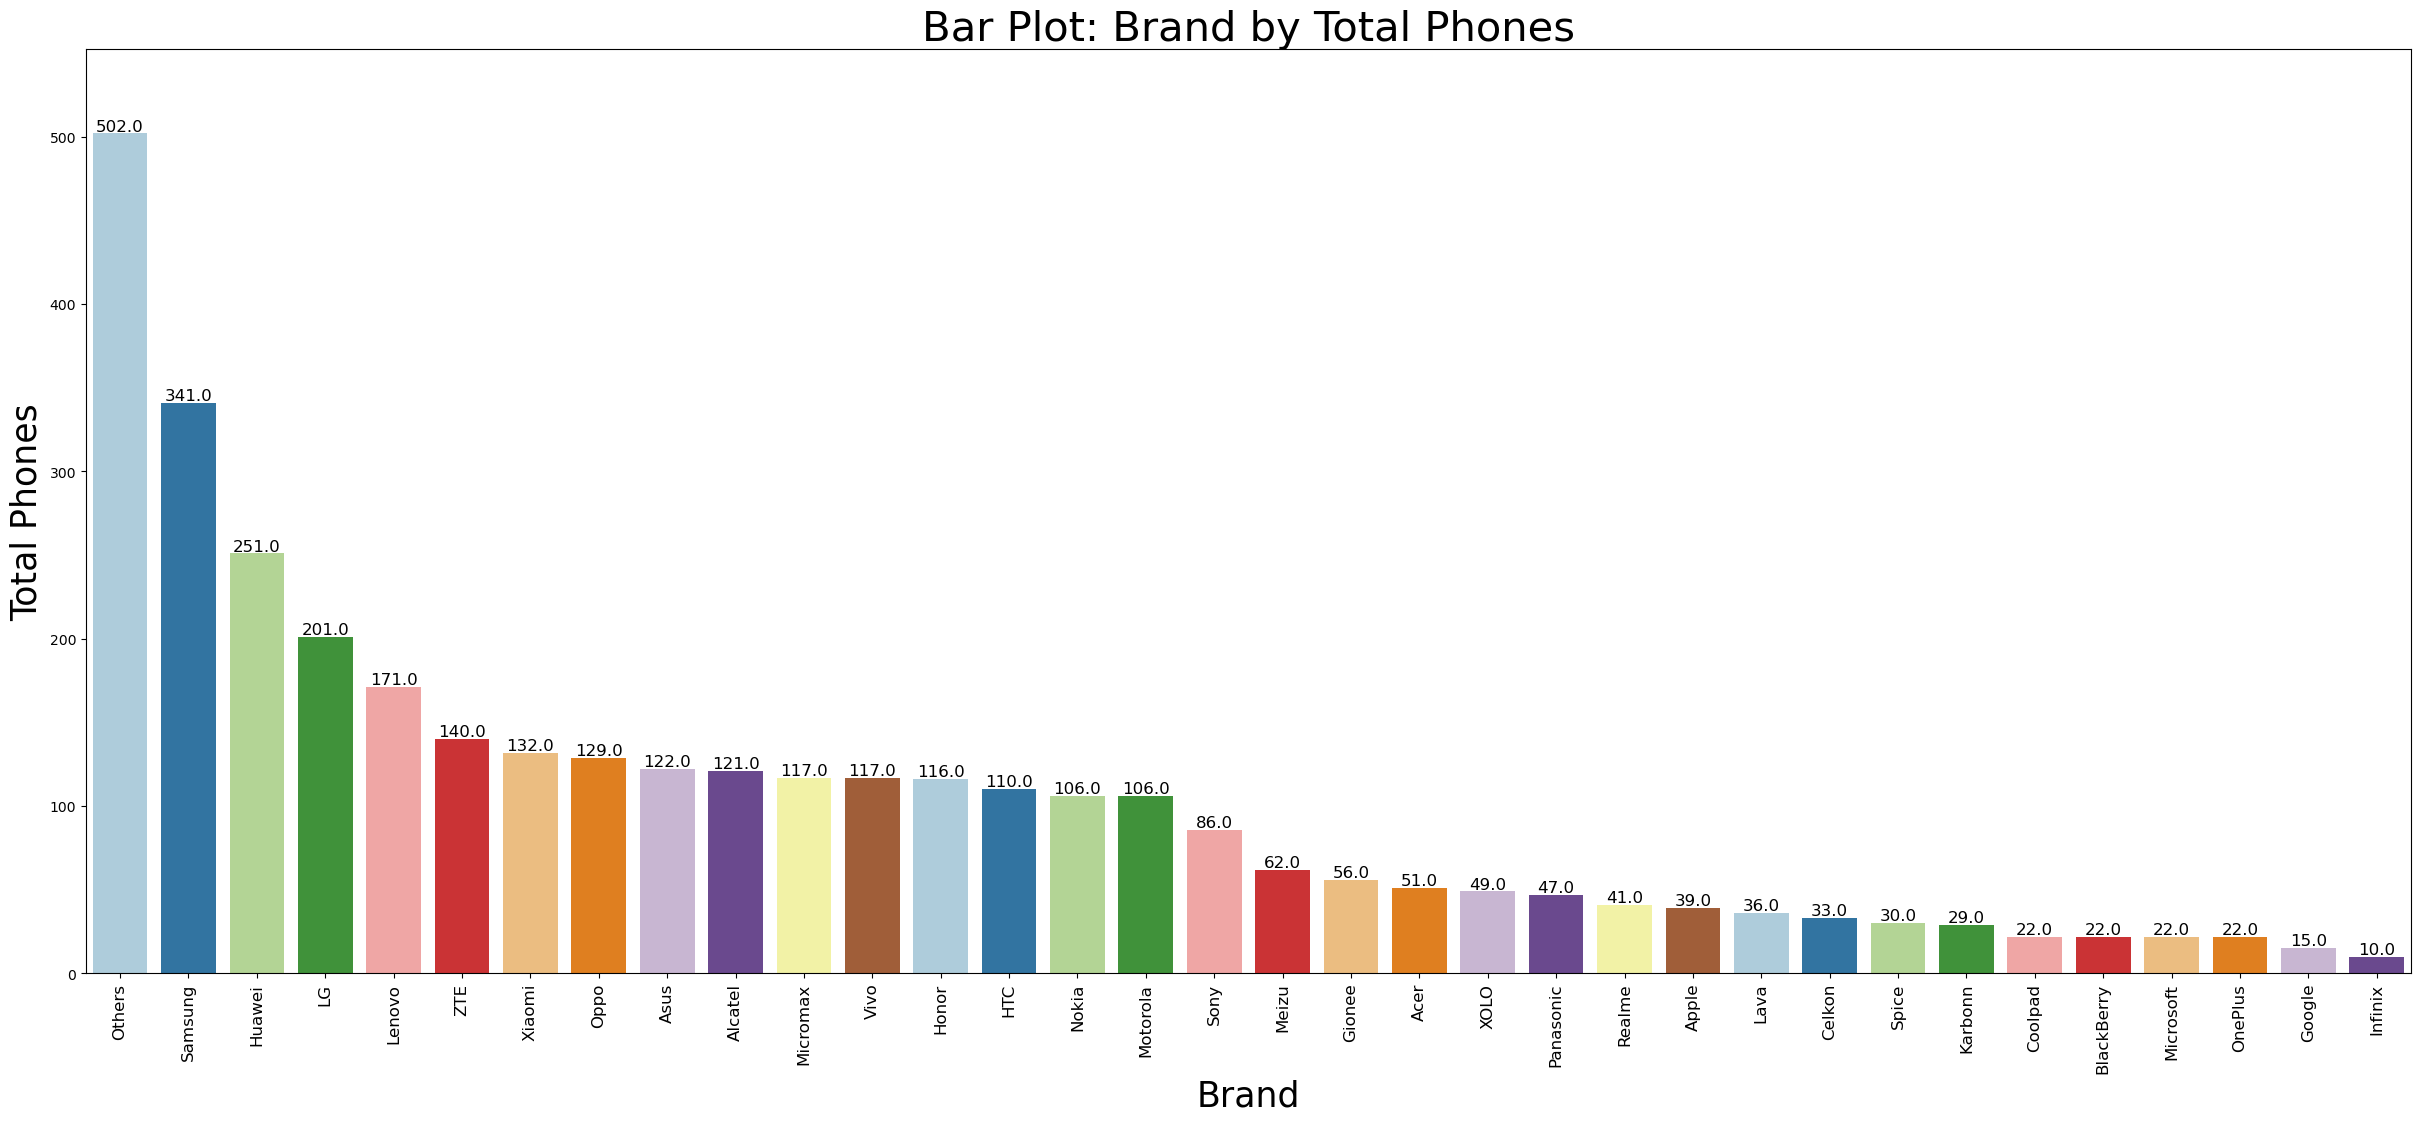

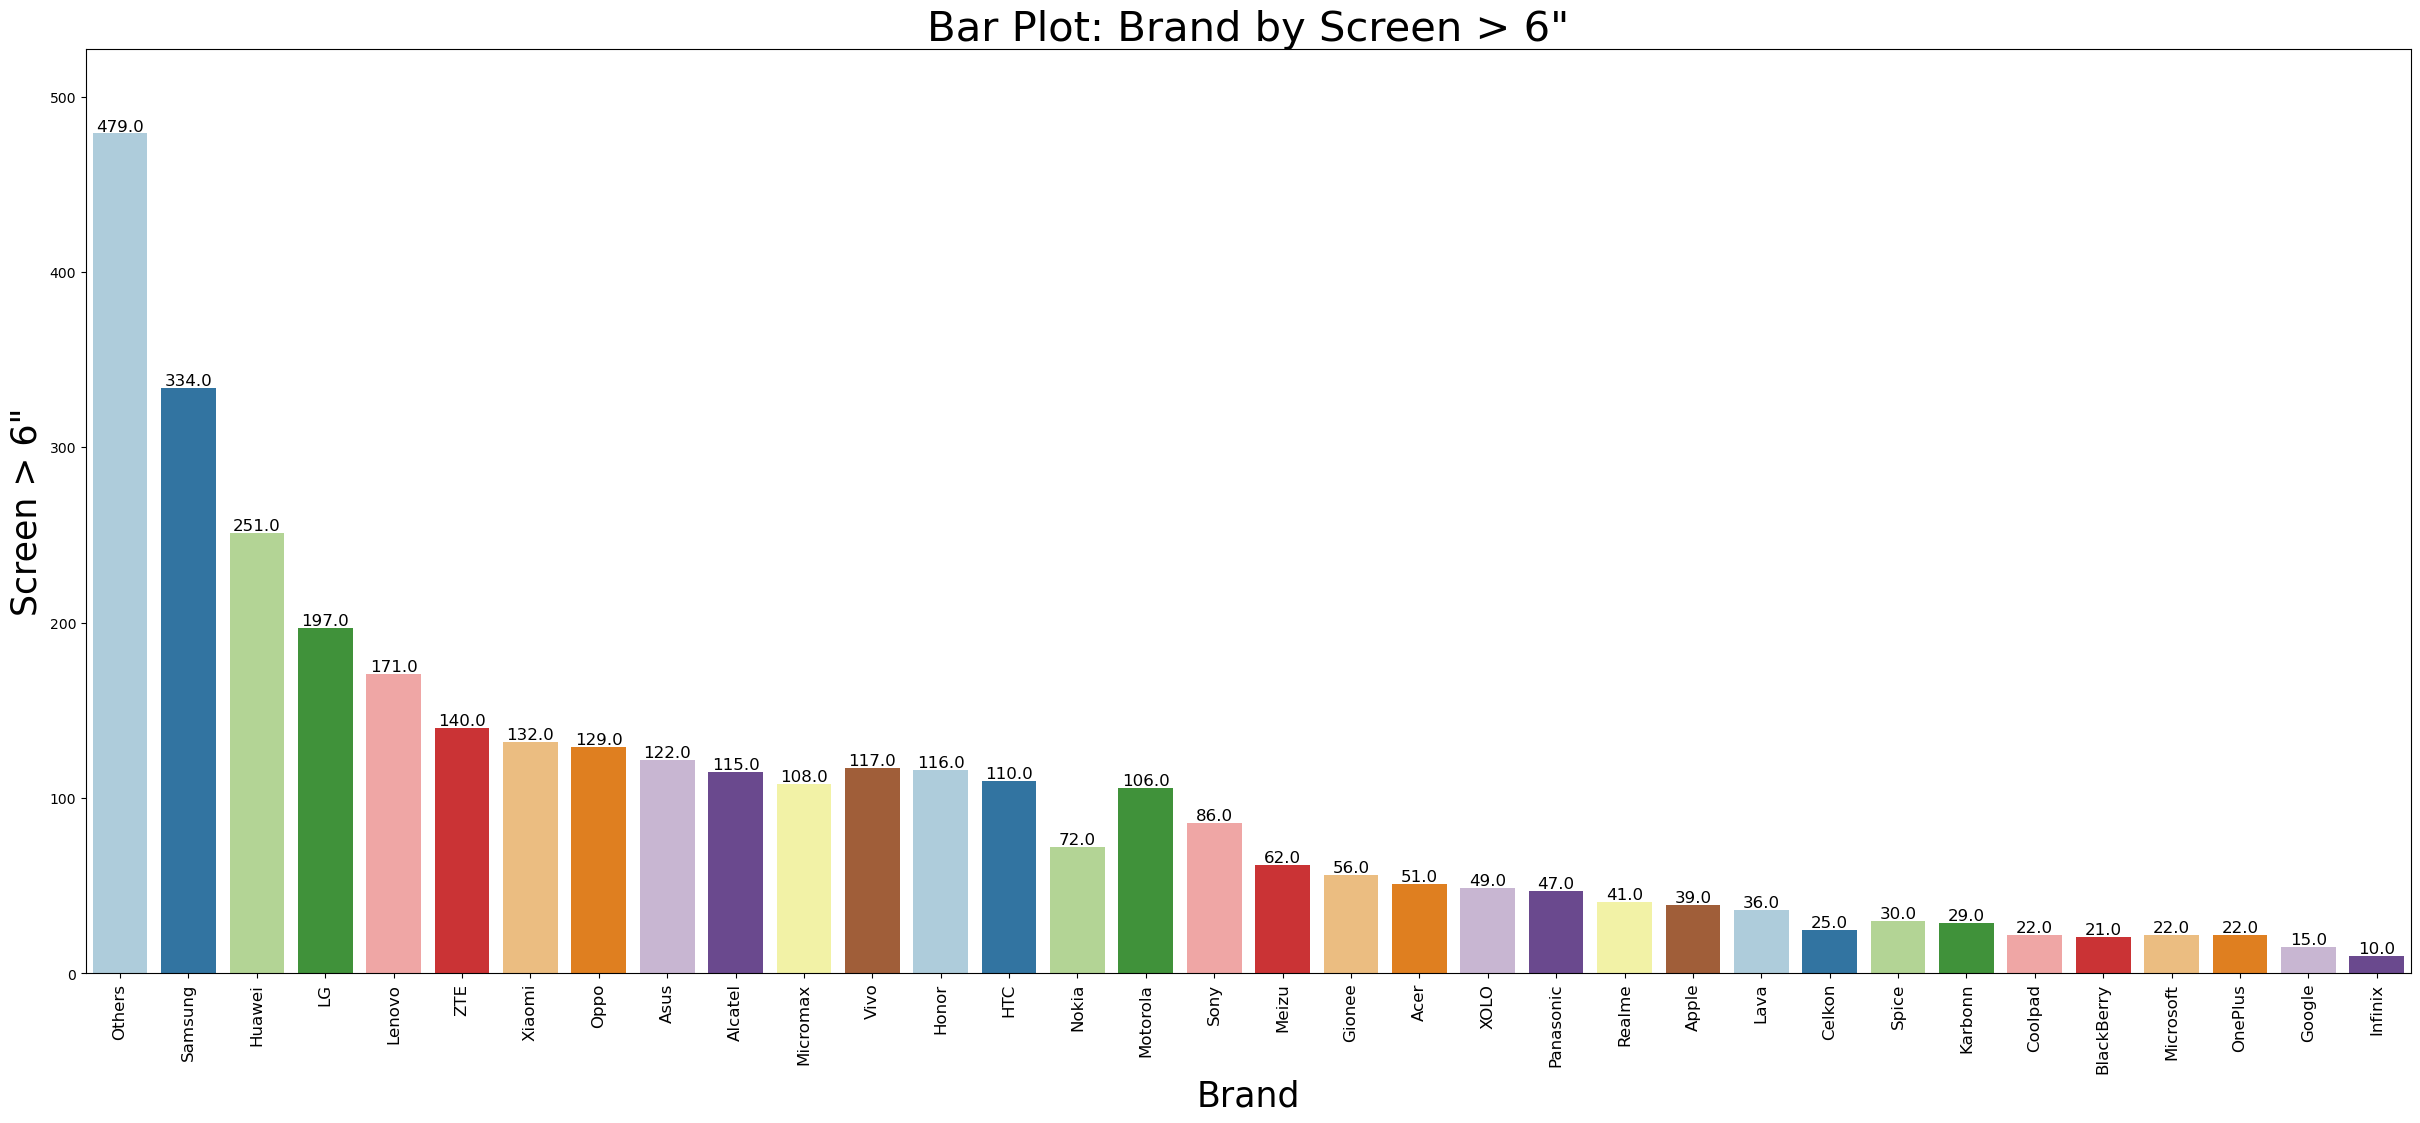

In [28]:
labeled_barplot(result_df, 'Total Phones', 'Brand')
labeled_barplot(result_df, 'Screen > 6"', 'Brand')

#### Observation:

There are 3362 phones and tablets total with a screen size larger than 6 inches.
The number of phones with a screen size larger than 6 inches by brand name is shown above. Noteably, Samsung is the brand that has the highest number of screen sizes larger than 6 inches (334), although the total number of Other unnamed brands is higher (479). The brand with the lowest number of screens larger than 6 inches is Infinix (10). Interestingly, for many of the brand's phone screen sizes, 100% were larger than 6 inches. Only 8 of the 34 brands named above had percentages lower than 100% of phones larger than 6 inches. The lowest percentage was Nokia where only 67.92% (72 of 106) phone screens were larger than 6 inches. 

## 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [29]:
# filter the dataframe to values greater than 8mp
df_selfie = df[df['selfie_camera_mp']>8]
# get value_count for brands in this category
print(df_selfie['brand_name'].value_counts())
#get the total cound for brands in this category
print(df_selfie['brand_name'].count())

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64
655


In [30]:
# create a dataframe of brand_name value counts
df_count = df['brand_name'].value_counts()
# create a dataframe of filtered brand_name value counts
df_selfie_count = df_selfie['brand_name'].value_counts()
# create a new dataframe and define the column names
result_df = pd.DataFrame(columns = ['Brand', 'Selfie Cam > 8MP', 'Total Phones', 'Percentage'])
# iterate through each unique brand_name value in the filtered dataframe
for i in df_selfie['brand_name'].unique():
    # get the percentage values
    percentage = (df_selfie_count[i] / df_count[i]) * 100
    # create the row data
    row = {'Brand': i, 'Selfie Cam > 8MP': df_selfie_count[i], 
          'Total Phones': df_count[i], 'Percentage': round(percentage,2)}
    # concatonate the DataFrame
    result_df = pd.concat([result_df, pd.DataFrame([row])])
# set the rows in ascending order and drop the index    
result_df = result_df.sort_values( by = 'Total Phones', ascending = False)
result_df = result_df.reset_index(drop = True)
# present the results 
result_df

,Brand,Selfie Cam > 8MP,Total Phones,Percentage
0,Others,34,502,6.77
1,Samsung,57,341,16.72
2,Huawei,87,251,34.66
3,LG,32,201,15.92
4,Lenovo,14,171,8.19
5,ZTE,20,140,14.29
6,Xiaomi,63,132,47.73
7,Oppo,75,129,58.14
8,Asus,6,122,4.92
9,Micromax,2,117,1.71


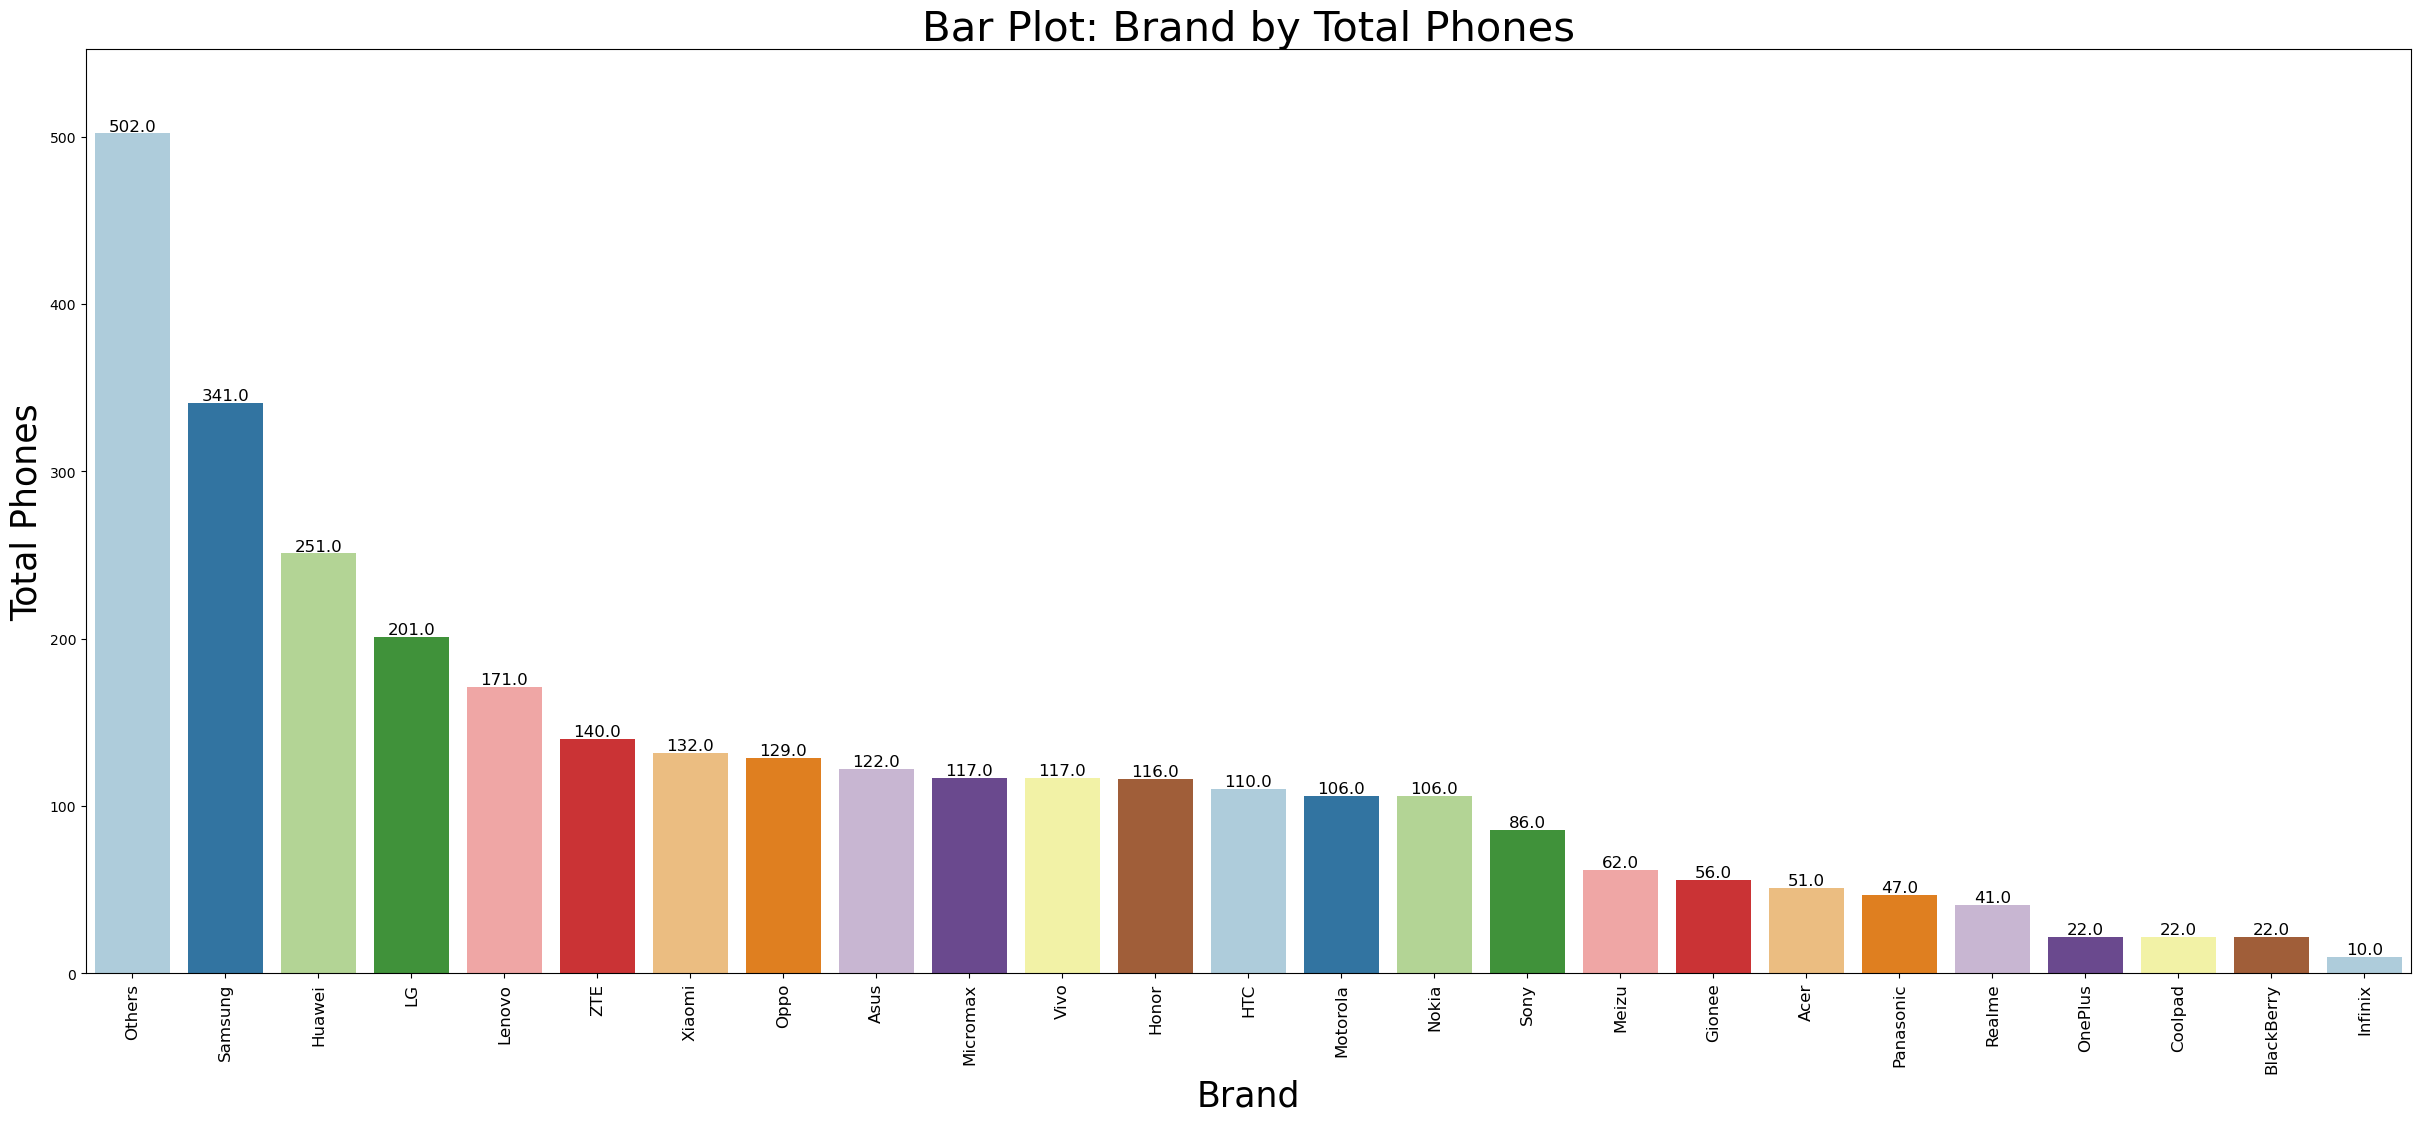

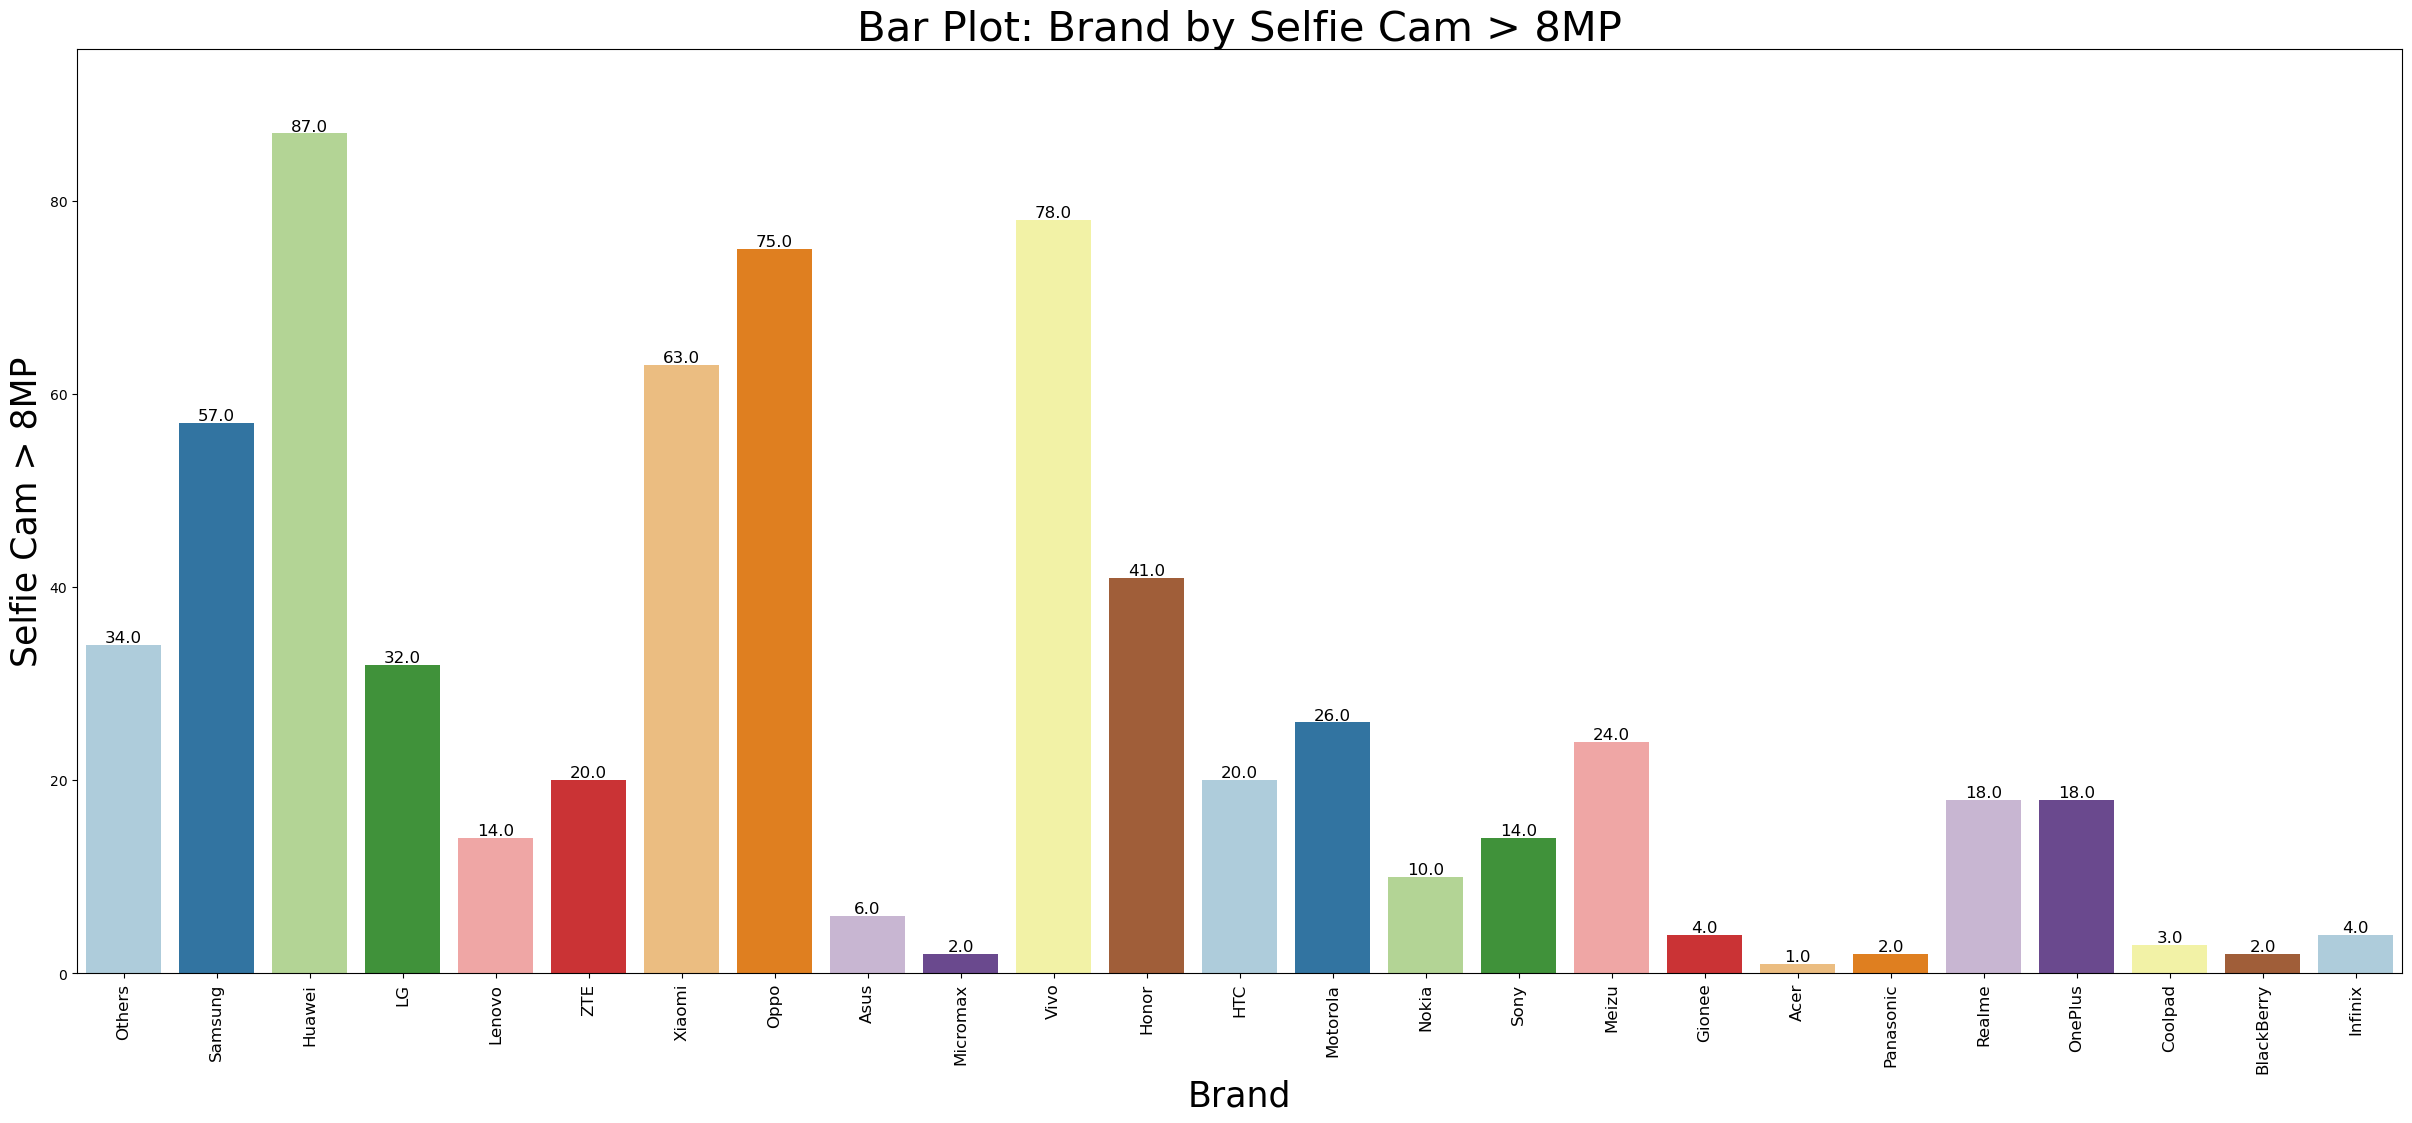

In [31]:
# run a labeled barplot for Total phone and Selfie Cam against Brand
labeled_barplot(result_df, 'Total Phones', 'Brand')
labeled_barplot(result_df, 'Selfie Cam > 8MP', 'Brand')

#### Observations:

There are 655 phones and tablets total with a selfie camera with greater than 8MP.
The number of phones with a selfie camera with greater than 8MP by brand name is shown above. Noteably, Huawei is the brand that has the highest number of phones with a selfie camera with greater than 8MP (87). The brand with the lowest number of phone with selfie camera with greater than 8MP is Acer (1). For 3 out of the 34 brands, over 50% of the total phones had a selfie camera with greater than 8MP. The rest were lower than 50%, with MicroMax only having 1.71% (2 of 117) phones that have a selfie camera with greater than 8MP. 

## 7. Which attributes are highly correlated with the normalized price of a used device?

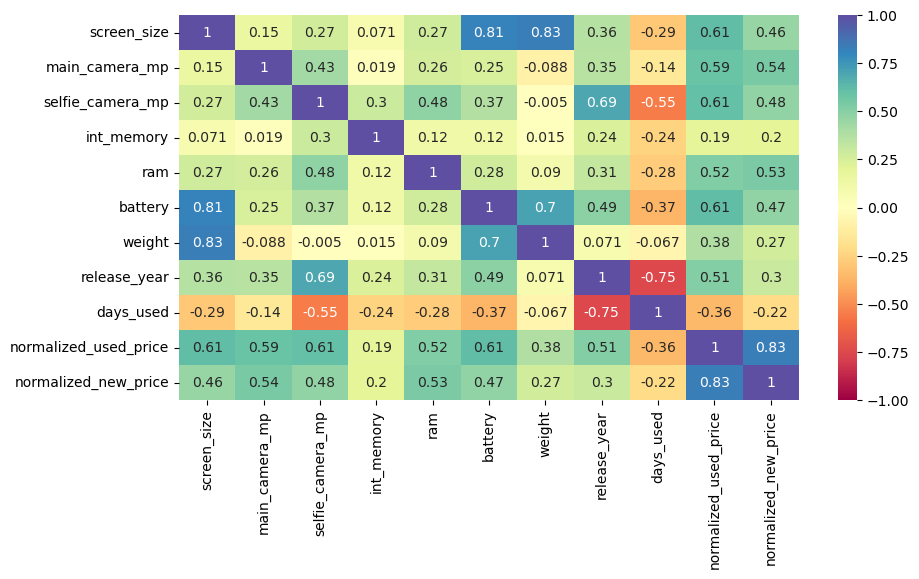

In [32]:
# show correlation with a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:

The only highly correlated variable with normalized_used_price is normalized_new_price (0.83). There are a few other correlated variables such as battery (0.61), selfie_camera_mp (0.61), screen_size (0.61), and main_camera_mp (0.59), but as they are below 0.7, I would not say that they are highly correlated with normalized_used_price. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [33]:
# create a copy of the dataframe
df1=df.copy()

In [34]:
# show the shape of the dataframe
df1.shape

(3454, 15)

In [35]:
# determine the non-null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Missing Value Treatement

In [36]:
# check for duplicated rows
df1.duplicated().sum()

0

In [37]:
# check for total number of missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [38]:
# determine the descriptive statistics
df1.main_camera_mp.describe()

count    3275.000000
mean        9.460208
std         4.815461
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

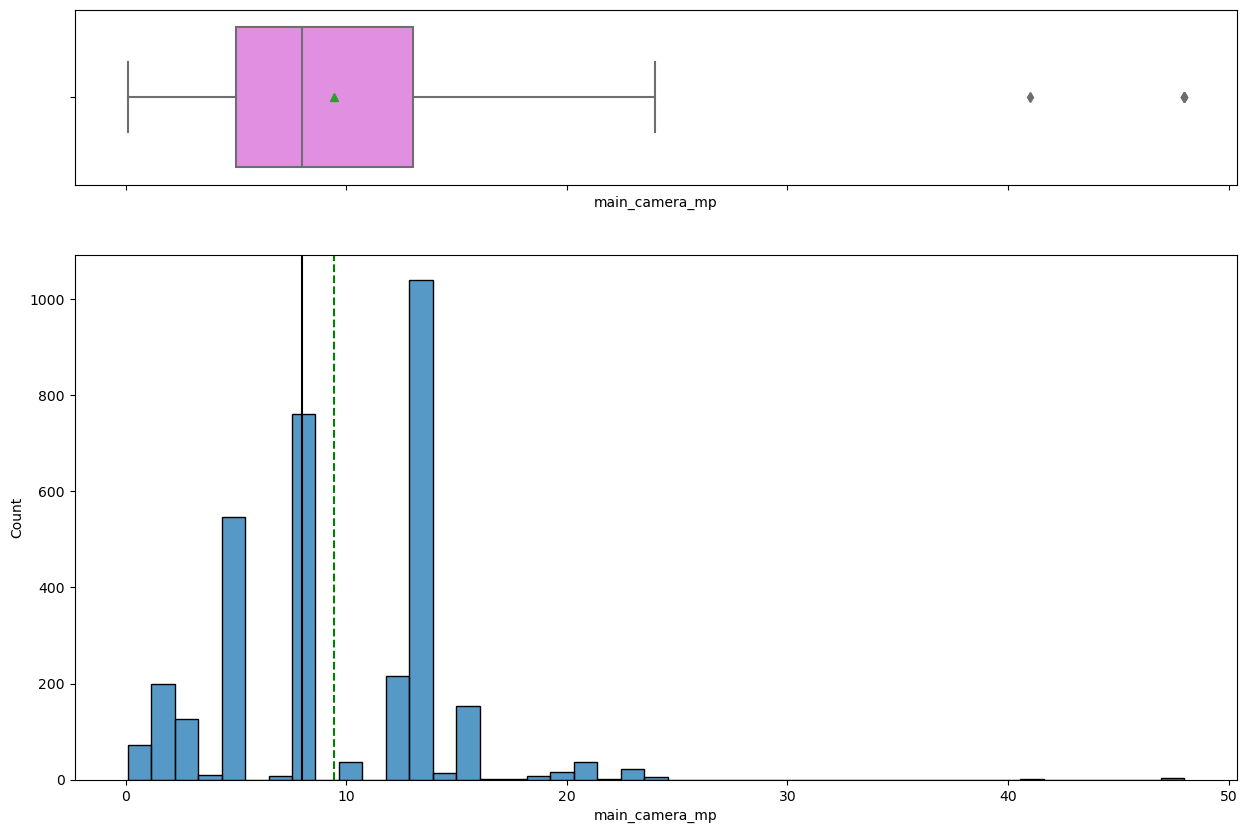

In [41]:
histogram_boxplot(df1, 'main_camera_mp')

In [42]:
# determine value counts for variable
df1['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

In [43]:
# create filtered dataframe
filtered_values_Android = df1.loc[df['os']== "Android", 'main_camera_mp']

In [44]:
# determine total missing values
filtered_values_Android.isnull().sum()

179

In [45]:
# create filtered dataframe
filtered_values_Others = df1.loc[df1['os']== "Others", 'main_camera_mp']

In [46]:
# determine total missing values
filtered_values_Others.isnull().sum()

0

In [47]:
# create filtered dataframe
filtered_values_Windows = df1.loc[df1['os']== "Windows", 'main_camera_mp']

In [48]:
# determine total missing values
filtered_values_Windows.isnull().sum()

0

In [49]:
# create filtered dataframe
filtered_values_iOS = df.loc[df['os']== "iOS", 'main_camera_mp']

In [50]:
# determine total missing values
filtered_values_iOS.isnull().sum()

0

In [58]:
# determine median value for main_camera_mp based on os = Android
df1['main_camera_mp'][df1['os']=='Android'].median()

8.1

In [53]:
# determine the descriptive statistics
df1['normalized_new_price'].describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

In [54]:
# show number of instances of main_camera_mp max value
df1[df1['main_camera_mp'] == 48]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
210,ZTE,Android,16.89,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,2019,336,5.668052,6.708780
215,ZTE,Android,16.89,yes,no,48.0,16.0,64.0,6.0,5000.0,215.0,2019,506,5.263726,6.217723
3240,Motorola,Android,15.34,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,2019,371,5.325933,5.541224
3381,Motorola,Android,15.34,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,2019,422,5.331027,5.541224


In [59]:
# show number of instances around normalized_new_price max value
df[df['normalized_new_price']> 7.5]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
198,Xiaomi,Android,20.12,yes,yes,12.0,20.0,512.0,12.0,4050.0,241.0,2019,478,6.619433,7.823342
1262,Huawei,Android,20.32,yes,no,13.0,16.0,512.0,4.0,4500.0,295.0,2019,434,5.887797,7.741043
3207,Huawei,Android,20.32,yes,yes,10.5,16.0,512.0,8.0,4500.0,300.0,2020,248,6.500448,7.847841
3348,Huawei,Android,20.32,yes,yes,10.5,16.0,512.0,8.0,4500.0,300.0,2020,129,5.959251,7.847841


In [56]:
# create filtered dataframe
filtered_values_Android = df1.loc[df1['os']== "Android", 'main_camera_mp']

In [61]:
# assign variable to median value
Android_median_values = filtered_values_Android.median()

In [62]:
# replace all missing values with median variable
df1['main_camera_mp'].fillna(Android_median_values, inplace = True)

In [63]:
# show non-null results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [64]:
# determine the descriptive statistics
df1['main_camera_mp'].describe()

count    3454.000000
mean        9.389716
std         4.698673
min         0.080000
25%         5.000000
50%         8.100000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

In [65]:
# determine the descriptive statistics
df1['selfie_camera_mp'].describe()

count    3452.000000
mean        6.554229
std         6.970372
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

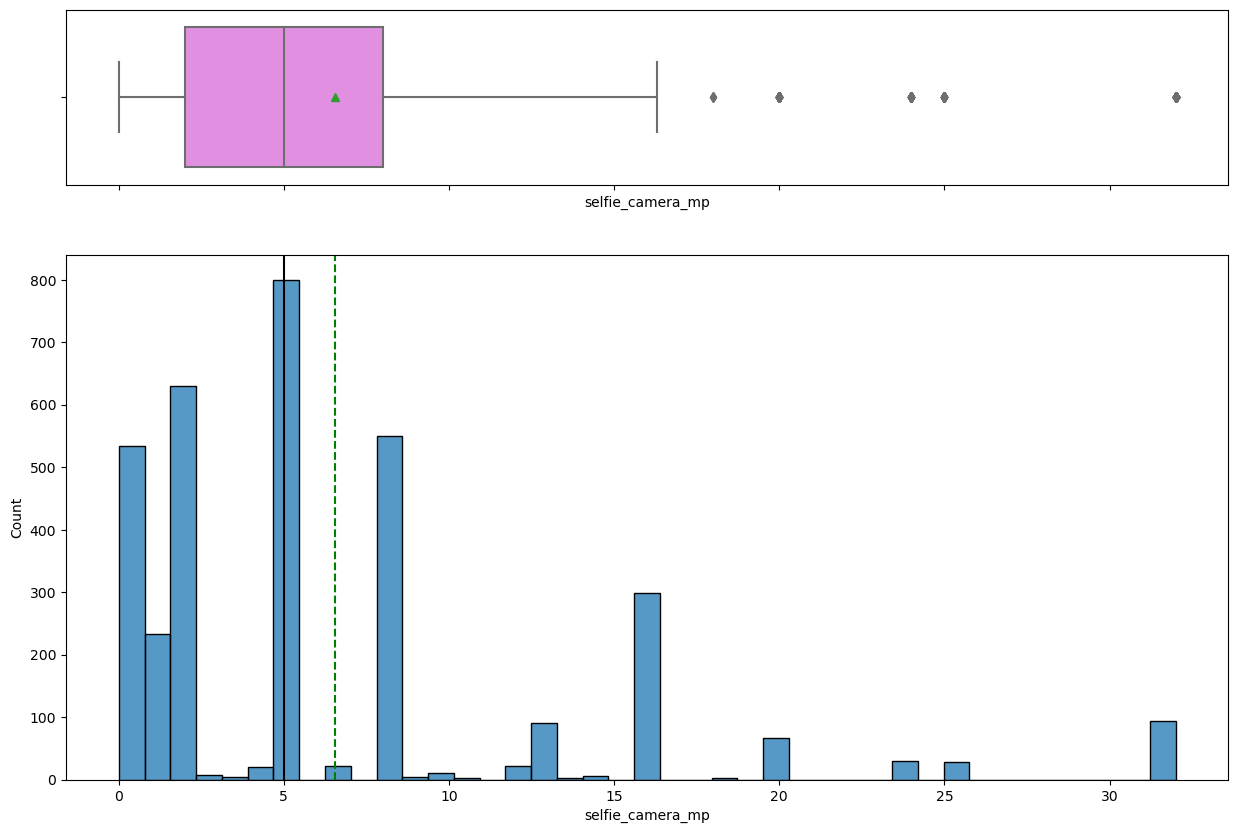

In [66]:
histogram_boxplot(df1, 'selfie_camera_mp')

In [67]:
# assigne median value to a variable
median_value = df1['selfie_camera_mp'].median()

In [68]:
# fill in missing values with median variable
df1['selfie_camera_mp'].fillna(median_value, inplace = True)

In [69]:
# present results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [70]:
# determine the descriptive statistics
df1['int_memory'].describe()

count    3450.000000
mean       54.573099
std        84.972371
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

In [71]:
# determine the descriptive statistics
df1['int_memory'].value_counts()

16.00      1283
32.00      1083
64.00       509
128.00      372
256.00       86
512.00       44
0.06         18
0.10         17
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: int_memory, dtype: int64

In [72]:
# assign median value to a variable
median_value = df1['int_memory'].median()
# fill in missing values with median variable
df1['int_memory'].fillna(median_value, inplace = True)

In [73]:
# determine the descriptive statistics
df1['int_memory'].describe()

count    3454.000000
mean       54.546957
std        84.926611
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

In [74]:
# present results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [75]:
# determine the descriptive statistics
df1['ram'].describe()

count    3450.000000
mean        4.036122
std         1.365105
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64

In [76]:
# determine value count for the variable
df1['ram'].value_counts()

4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
0.50        9
1.50        1
Name: ram, dtype: int64

In [77]:
# assign median value to a variable
median_value = df1['ram'].median()
# fill in missing values with median variable
df1['ram'].fillna(median_value, inplace = True)

In [78]:
# determine the descriptive statistics
df1['ram'].describe()

count    3454.000000
mean        4.036080
std         1.364314
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64

In [79]:
# present results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [80]:
# determine the descriptive statistics
df1['battery'].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

In [81]:
# determine value count for the variable
df1['battery'].value_counts()

4000.0    341
3000.0    314
2000.0    244
2500.0    137
2100.0    121
         ... 
6180.0      1
4180.0      1
2180.0      1
2880.0      1
3110.0      1
Name: battery, Length: 324, dtype: int64

In [82]:
# assign median value to a variable
median_value = df1['battery'].median()
# fill in missing values with median variable
df1['battery'].fillna(median_value, inplace = True)

In [83]:
# determine the descriptive statistics
df1['battery'].describe()

count    3454.000000
mean     3133.170961
std      1298.565062
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

In [84]:
# present results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [85]:
# determine the descriptive statistics
df1['weight'].describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

In [86]:
# determine value count for the variable
df1['weight'].value_counts()

150.0    112
140.0     86
160.0     80
155.0     68
145.0     68
        ... 
157.5      1
372.0      1
340.2      1
319.8      1
240.0      1
Name: weight, Length: 555, dtype: int64

In [87]:
# assign median value to a variable
median_value = df1['weight'].median()
# fill in missing values with median variable
df1['weight'].fillna(median_value, inplace = True)

In [88]:
# determine the descriptive statistics
df1['weight'].describe()

count    3454.000000
mean      182.705761
std        88.329494
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

In [89]:
# present results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [90]:
# present the total number of missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

In [91]:
# create new variable for years old from todays date and the release year variable
df1['years_old'] = 2023 - df1['release_year']
# drop old variable
df1.drop(['release_year'], axis = 1, inplace = True)
# present results
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_old
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,3
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,3
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,3
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,3
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,3


### Outlier Detection

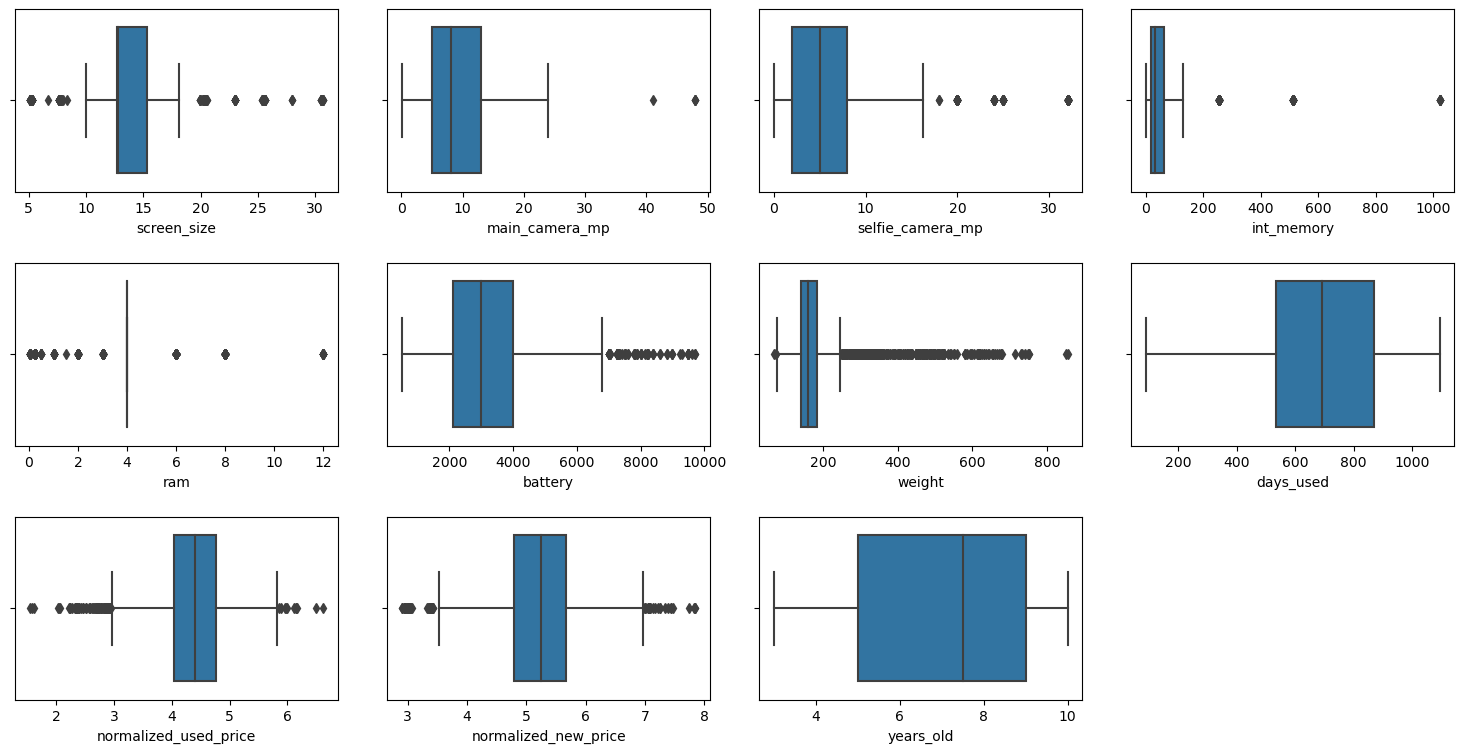

In [92]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [93]:
# iterate through unique values and print the count for each
for i in df1['int_memory'].unique():
    count = df1['int_memory'].value_counts()[i]
    print(f'{round(i, 2)} GB of memory. Count = {count}' )
    
print('-------------')
# iterate through unique values and print the count for each
for i in df1['ram'].unique():
    count = df1['ram'].value_counts()[i]
    print(f'{i} GB of RAM. Count = {count}')

64.0 GB of memory. Count = 509
128.0 GB of memory. Count = 372
32.0 GB of memory. Count = 1087
16.0 GB of memory. Count = 1283
256.0 GB of memory. Count = 86
512.0 GB of memory. Count = 44
8.0 GB of memory. Count = 12
4.0 GB of memory. Count = 10
0.5 GB of memory. Count = 4
0.2 GB of memory. Count = 2
0.1 GB of memory. Count = 17
0.06 GB of memory. Count = 18
1024.0 GB of memory. Count = 8
24.0 GB of memory. Count = 1
0.01 GB of memory. Count = 1
-------------
3.0 GB of RAM. Count = 81
8.0 GB of RAM. Count = 130
6.0 GB of RAM. Count = 154
4.0 GB of RAM. Count = 2819
2.0 GB of RAM. Count = 90
1.0 GB of RAM. Count = 34
12.0 GB of RAM. Count = 18
0.5 GB of RAM. Count = 9
0.25 GB of RAM. Count = 83
0.03 GB of RAM. Count = 17
0.02 GB of RAM. Count = 18
1.5 GB of RAM. Count = 1


In [94]:
# iterate through unique values and print the count for each
for i in df1['main_camera_mp'].unique():
    count = df1['main_camera_mp'].value_counts()[i]
    print(f'{i} MP. Count = {count}')

print('-------------')
# iterate through unique values and print the count for each
for i in df1['selfie_camera_mp'].unique():
    count = df1['selfie_camera_mp'].value_counts()[i]
    print(f'{i} MP. Count = {count}')

13.0 MP. Count = 1035
8.0 MP. Count = 755
5.0 MP. Count = 546
10.5 MP. Count = 30
3.15 MP. Count = 122
8.1 MP. Count = 186
2.0 MP. Count = 171
16.0 MP. Count = 154
0.3 MP. Count = 69
12.0 MP. Count = 189
14.5 MP. Count = 13
48.0 MP. Count = 4
3.0 MP. Count = 5
21.0 MP. Count = 19
1.3 MP. Count = 26
13.1 MP. Count = 6
24.0 MP. Count = 5
0.08 MP. Count = 1
20.7 MP. Count = 16
23.0 MP. Count = 19
1.0 MP. Count = 1
18.0 MP. Count = 1
12.2 MP. Count = 12
12.3 MP. Count = 9
20.0 MP. Count = 13
20.2 MP. Count = 1
4.0 MP. Count = 10
12.5 MP. Count = 4
10.0 MP. Count = 6
6.5 MP. Count = 4
6.7 MP. Count = 4
41.0 MP. Count = 1
20.1 MP. Count = 1
12.6 MP. Count = 1
16.3 MP. Count = 1
22.6 MP. Count = 1
19.0 MP. Count = 8
21.5 MP. Count = 1
21.2 MP. Count = 2
1.2 MP. Count = 1
22.5 MP. Count = 1
-------------
5.0 MP. Count = 793
16.0 MP. Count = 298
8.0 MP. Count = 549
32.0 MP. Count = 94
2.0 MP. Count = 538
0.3 MP. Count = 492
13.0 MP. Count = 90
14.5 MP. Count = 5
24.0 MP. Count = 30
10.0 MP. Cou

#### Observations:

All outliers will be included in the data because they all seem to be proper values

## EDA

- It is a good idea to explore the data once again after manipulating it.

## 1. What does the distribution of normalized used device prices look like?

In [95]:
# describe the descriptive statistics of the variable
df1.normalized_new_price.describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

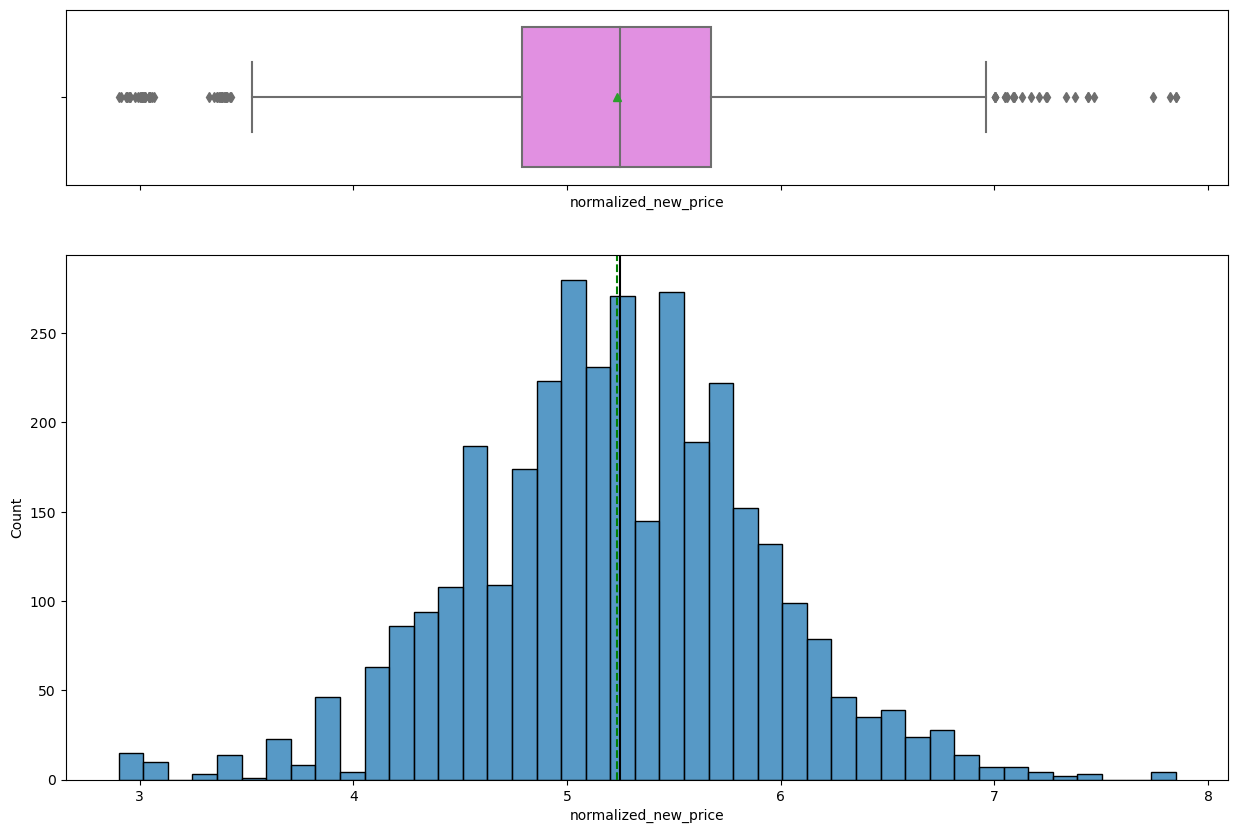

In [96]:
# run a histogram/boxplot function on normalized_new_price
histogram_boxplot(df1, 'normalized_new_price')

#### Observations:


No changes from original EDA

## 2. What percentage of the used device market is dominated by Android devices?

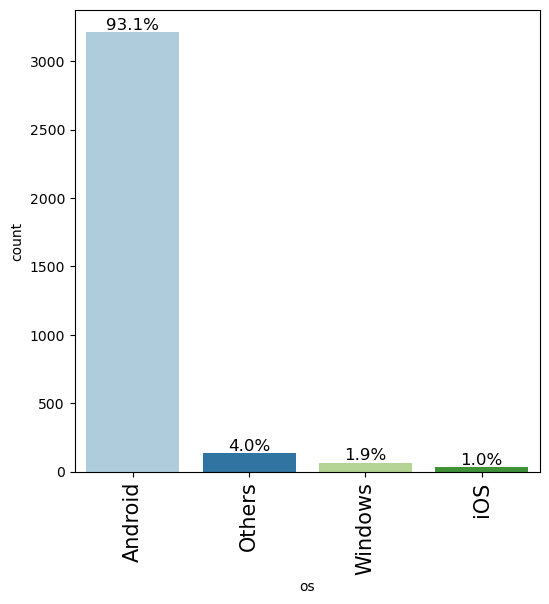

In [97]:
# run a countplot function on os
labeled_countplot(df1, 'os', perc = True)

#### Observations:


No changes from original EDA

## 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [98]:
# determine the number of unique values for brand_name
df1['brand_name'].nunique()

34

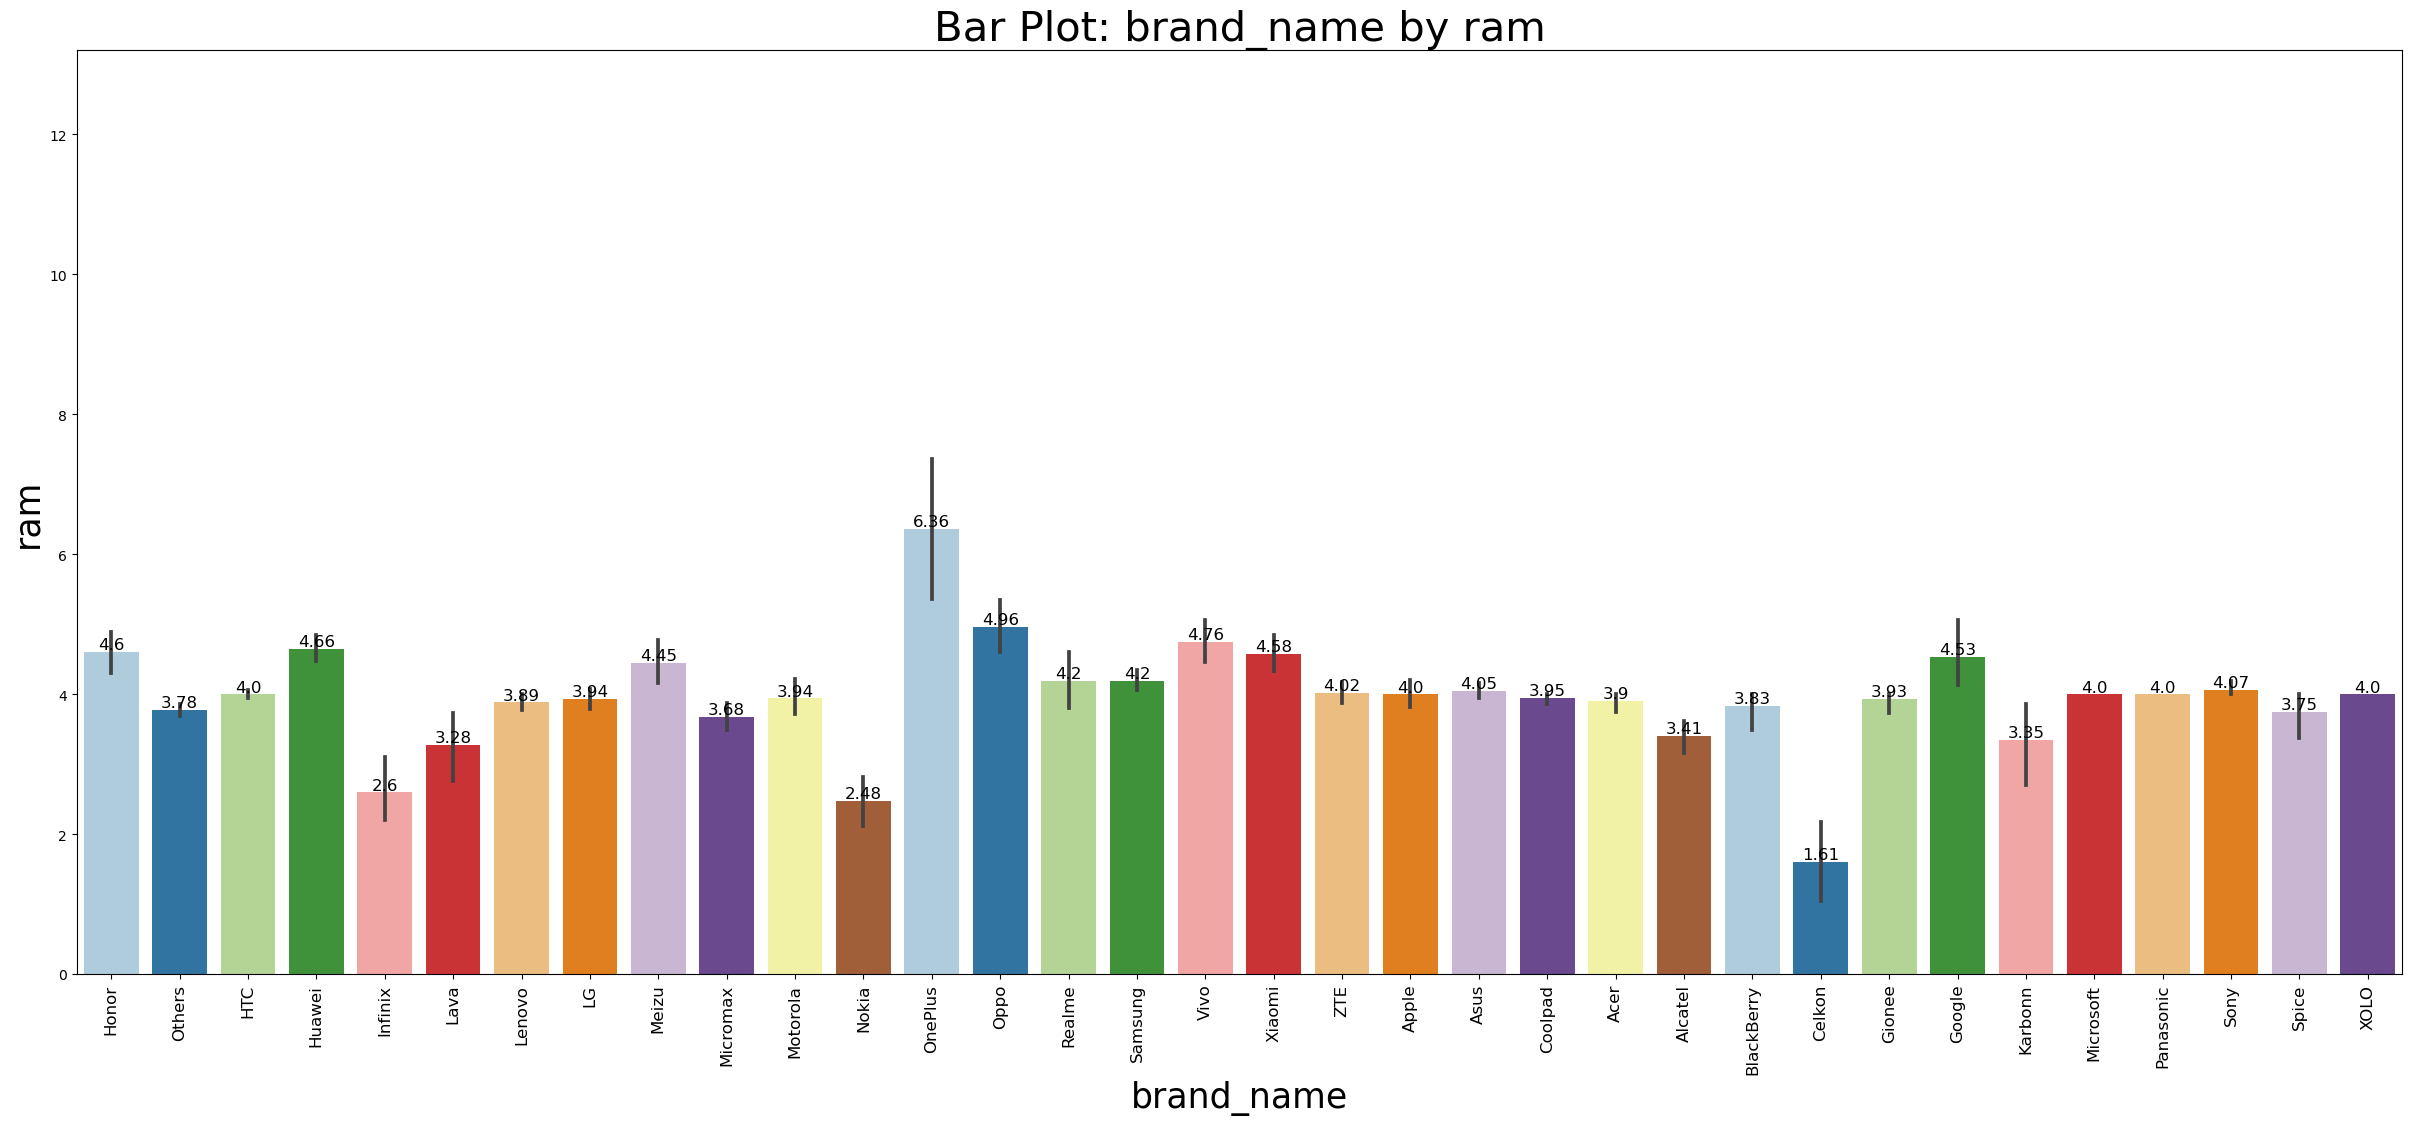

In [99]:
# run a barplot function on ram against brand_name
labeled_barplot(df1, 'ram', 'brand_name' )

#### Observations:

Nokia increase in average ram 2.42 to 2.48
No other changes

## 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [100]:
# describe the descriptive statistics of the variable
df1['battery'].describe()

count    3454.000000
mean     3133.170961
std      1298.565062
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

In [101]:
# create a filtered dataset for battery>4500
df_w1 = df1[df1['battery']>4500]

In [102]:
# show the filtered datasets shape
df_w1.shape

(341, 15)

In [103]:
# create a filtered dataframe for the unique value counts
value_counts1 = df_w1['battery'].value_counts()

# Filter the DataFrame to keep only values appearing more than 1 time
filtered_df1 = df_w1[df_w1['battery'].isin(value_counts1[value_counts > 1].index)]
# present the total number of unique values
print(df1['battery'].nunique())
# present the filtered number of unique values
print(filtered_df1['battery'].nunique())

324
44


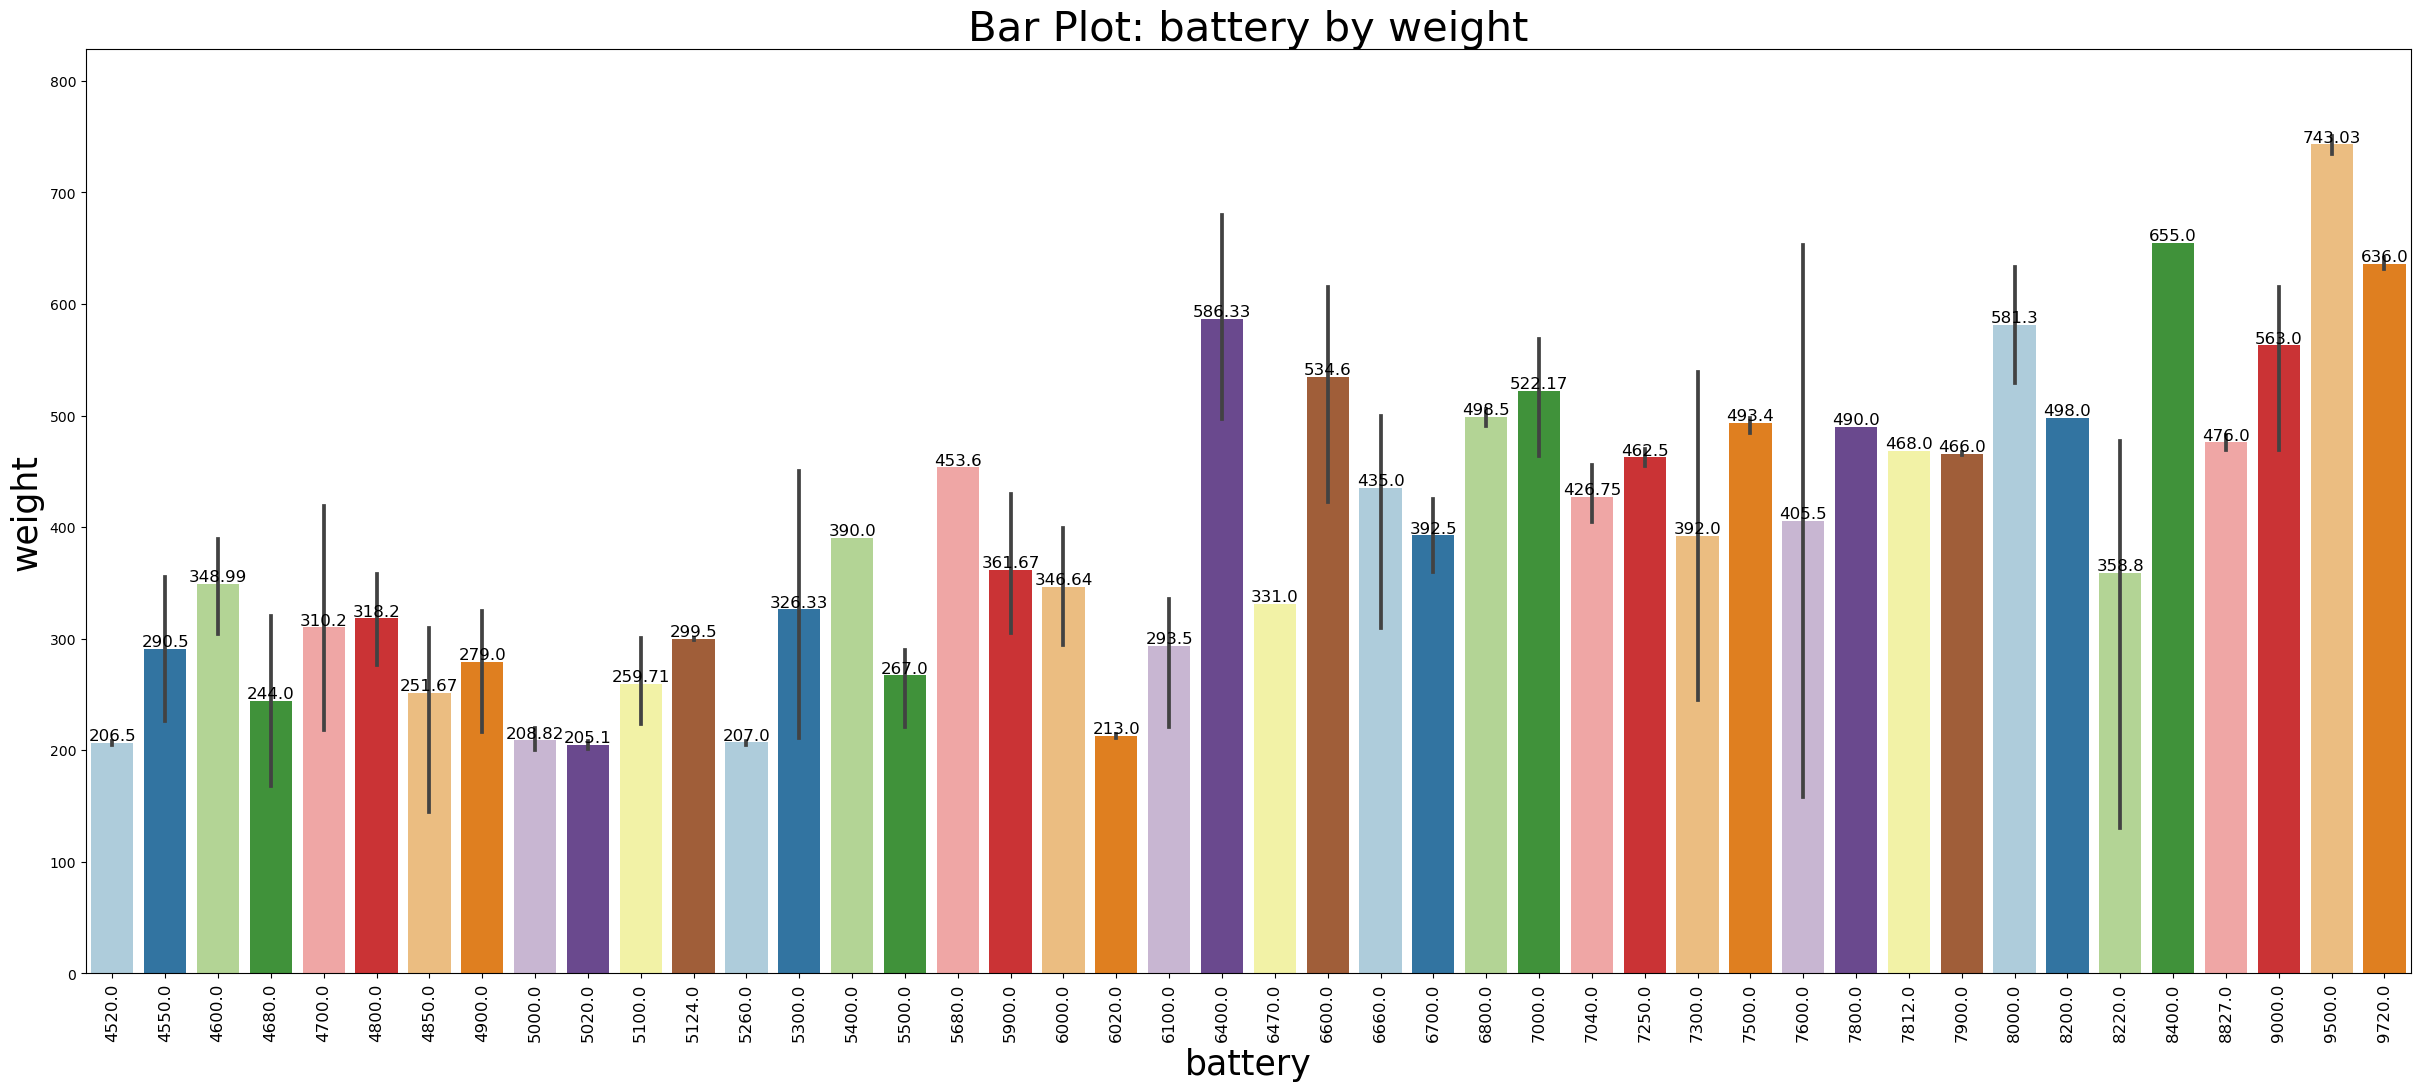

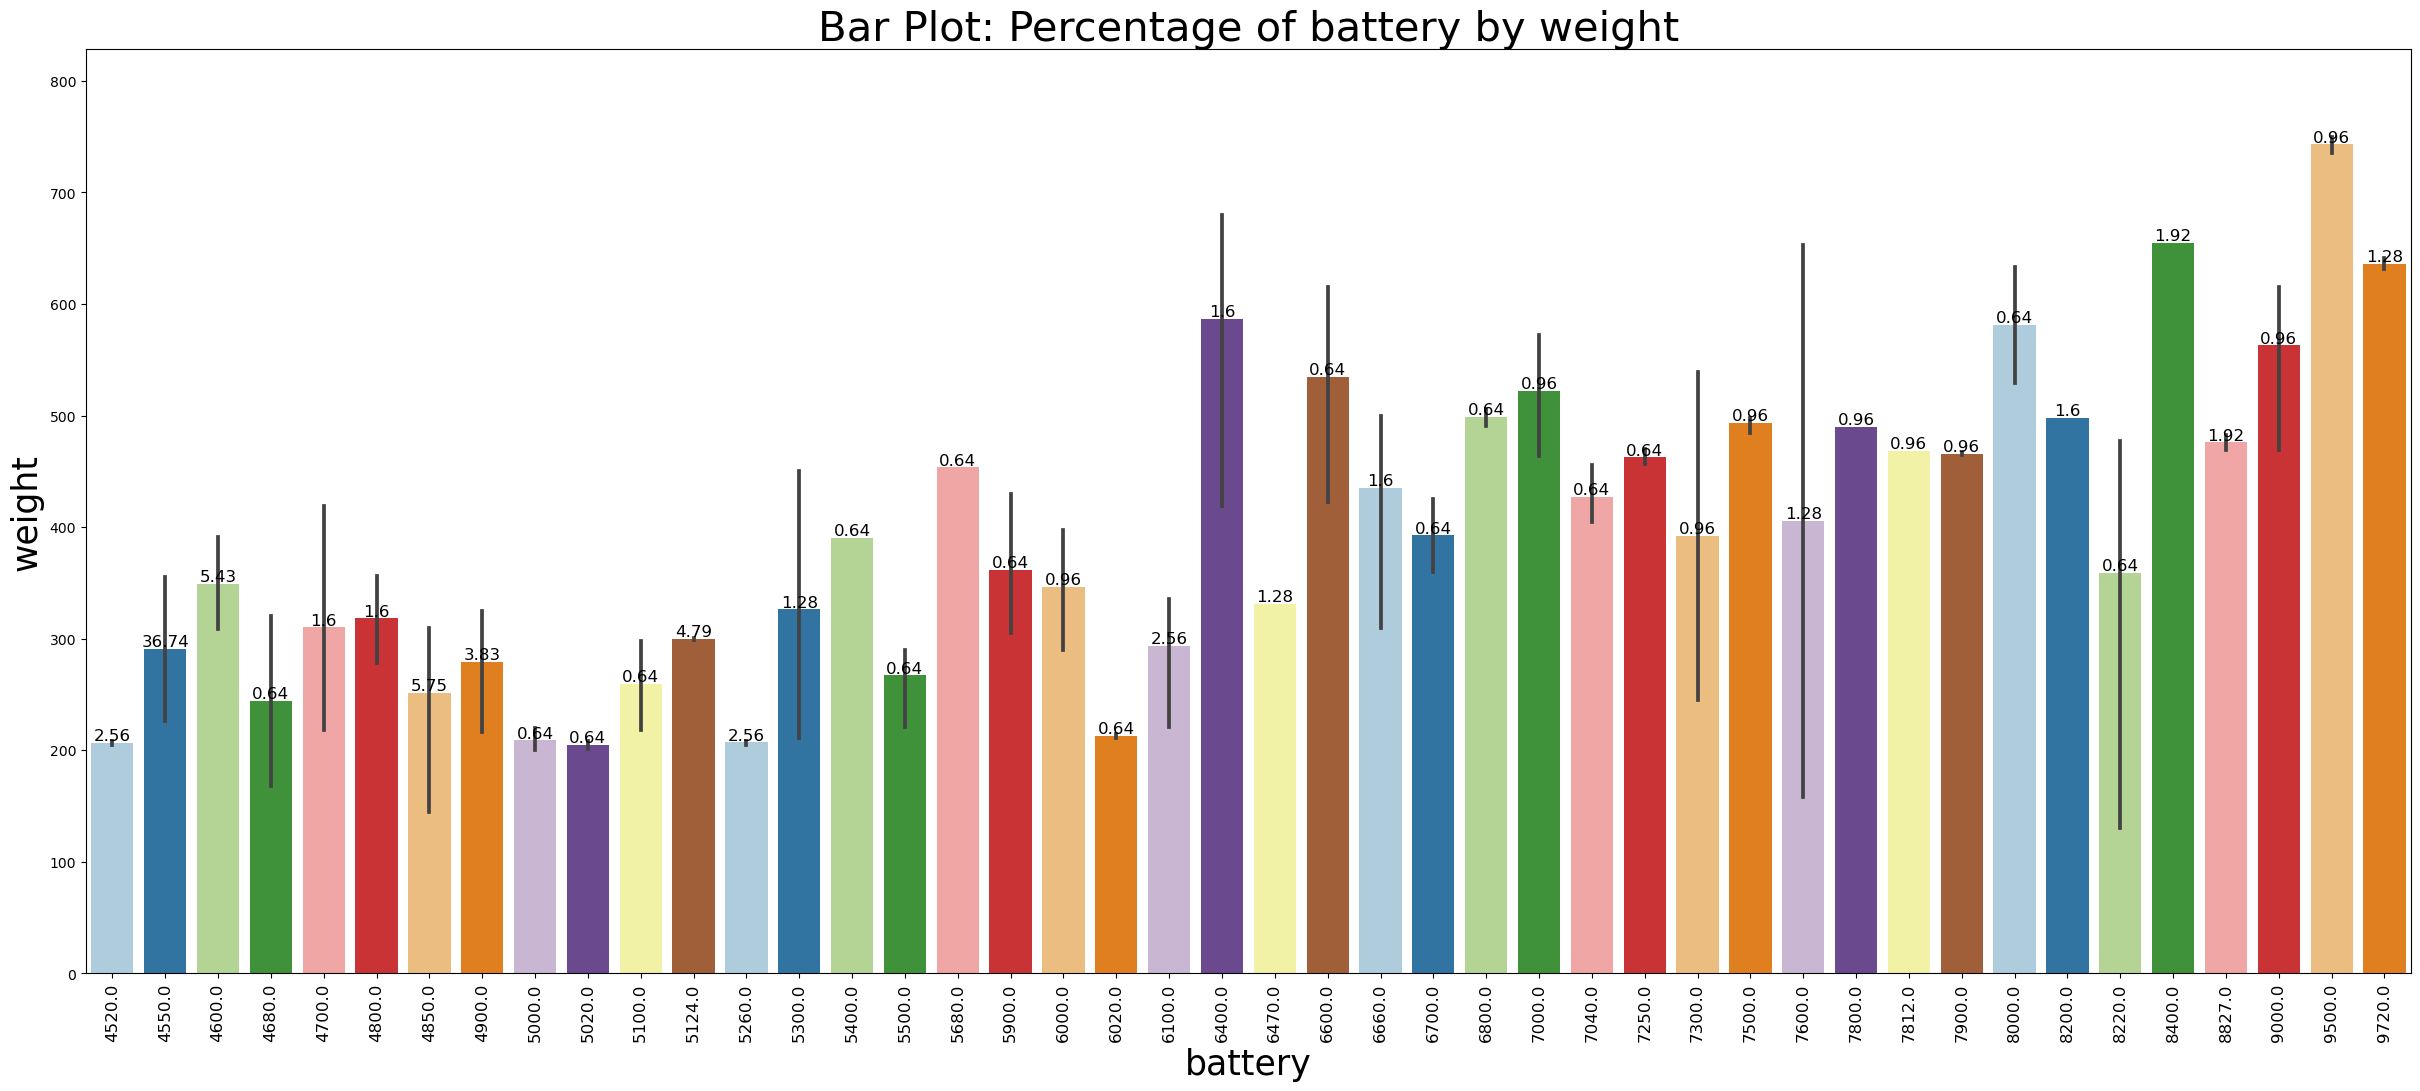

In [104]:
# run a barplot function on weight and battery with filtered dataframe
labeled_barplot(filtered_df1, 'weight', 'battery')
labeled_barplot(filtered_df1, 'weight', 'battery', perc = True)

#### Observations:

A few changes in the Descriptive statistics:
Count: 3448 to 3454, Mean: 3133.40 to 3133.17, std: 1299.68 to 1298.57



## 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [105]:
# filtere dataframe by screensize > 6"
df_screen1 = df1[df1['screen_size'] >6]
# describe results
print(df_screen1['screen_size'].describe())

count    3362.000000
mean       13.946047
std         3.583129
min         6.680000
25%        12.700000
50%        12.830000
75%        15.370000
max        30.710000
Name: screen_size, dtype: float64


In [106]:
# create a dataframe of brand_name value counts
df_count1 = df1['brand_name'].value_counts()
# create a dataframe of filtered brand_name value counts
df_screen_count1 = df_screen1['brand_name'].value_counts()
# create a new dataframe and define the column names
result_df1 = pd.DataFrame(columns = ['Brand', 'Screen > 6"', 'Total Phones', 'Percentage'])
# iterate through each unique brand_name value in the filtered dataframe
for i in df_screen1['brand_name'].unique():
    # get the percentage values
    percentage = (df_screen_count1[i]/df_count1[i]) * 100
    # create the row data
    row= {'Brand': i, 'Screen > 6"': df_screen_count1[i], 
          'Total Phones': df_count1[i], 'Percentage': round(percentage,2)}
    # concatonate the DataFrame
    result_df1 = pd.concat([result_df1, pd.DataFrame([row])])

# set the rows in ascending order and drop the index
result_df1 = result_df1.sort_values( by = 'Total Phones', ascending = False)
result_df1 = result_df1.reset_index(drop = True)
# present the results 
result_df1

,Brand,"Screen > 6""",Total Phones,Percentage
0,Others,479,502,95.42
1,Samsung,334,341,97.95
2,Huawei,251,251,100.00
3,LG,197,201,98.01
4,Lenovo,171,171,100.00
5,ZTE,140,140,100.00
6,Xiaomi,132,132,100.00
7,Oppo,129,129,100.00
8,Asus,122,122,100.00
9,Alcatel,115,121,95.04


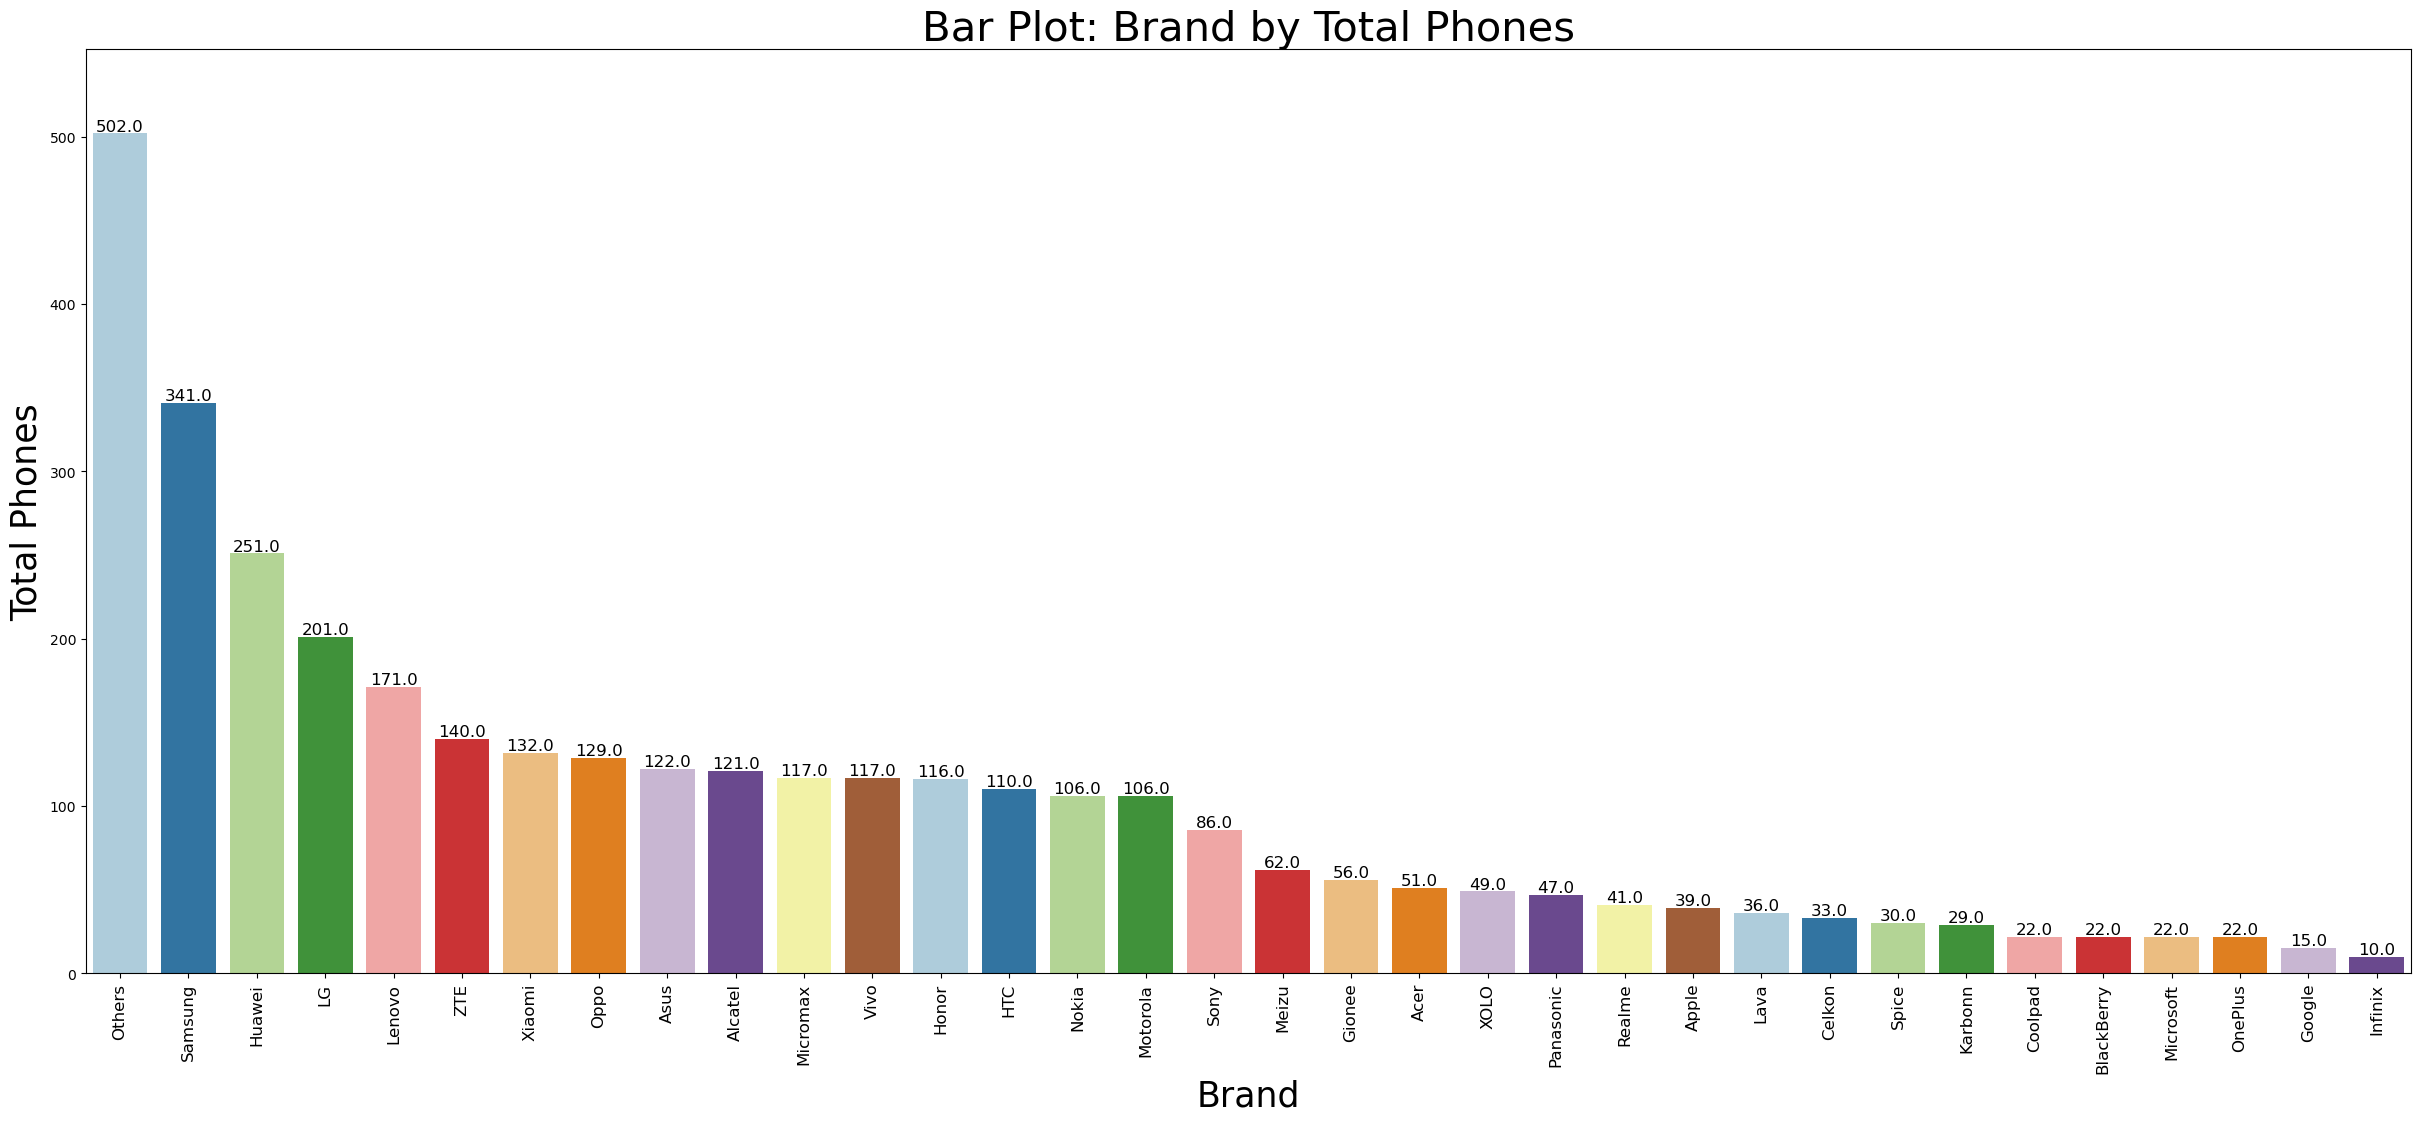

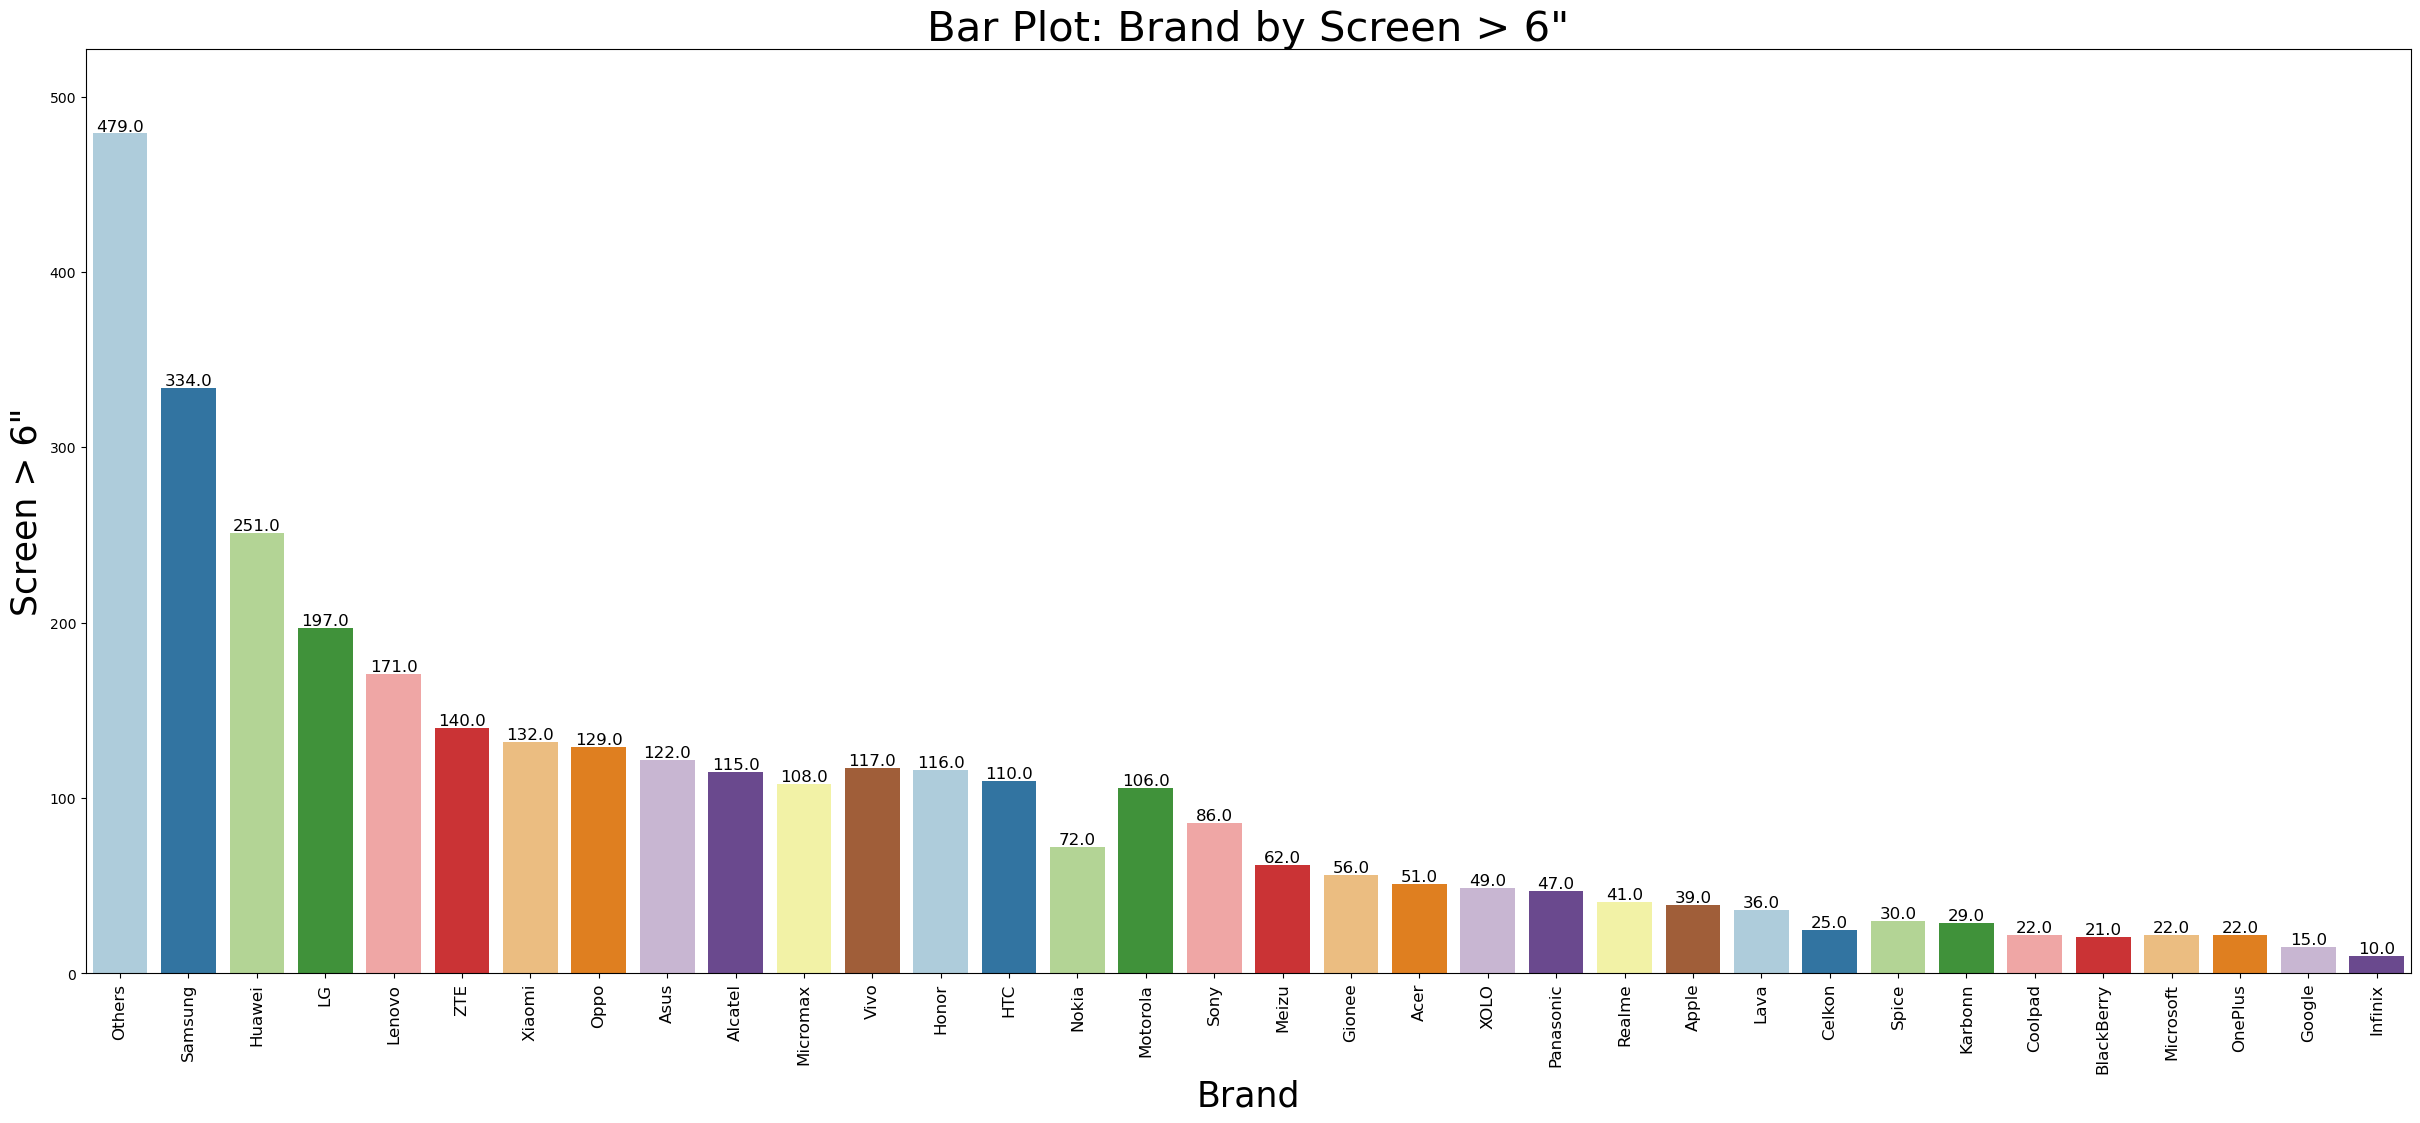

In [107]:
# run a barplot function on Total Phones and Screen > 6" against Brand
labeled_barplot(result_df1, 'Total Phones', 'Brand')
labeled_barplot(result_df1, 'Screen > 6"', 'Brand')

#### Observations:


No changes from original EDA

## 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [108]:
# filter the dataframe to values greater than 8mp
df_selfie1 = df1[df1['selfie_camera_mp']>8]
# get value_count for brands in this category
print(df_selfie1['brand_name'].value_counts())
#get the total cound for brands in this category
print(df_selfie1['brand_name'].count())

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64
655


In [109]:
# create a dataframe of brand_name value counts
df_count1 = df1['brand_name'].value_counts()
# create a dataframe of filtered brand_name value counts
df_selfie_count1 = df_selfie1['brand_name'].value_counts()
# create a new dataframe and define the column names
result_df1 = pd.DataFrame(columns = ['Brand', 'Selfie Cam > 8MP', 'Total Phones', 'Percentage'])
# iterate through each unique brand_name value in the filtered dataframe
for i in df_selfie1['brand_name'].unique():
    # get the percentage values
    percentage = (df_selfie_count1[i] / df_count1[i]) * 100
    # create the row data
    row = {'Brand': i, 'Selfie Cam > 8MP': df_selfie_count1[i], 
          'Total Phones': df_count1[i], 'Percentage': round(percentage,2)}
    # concatonate the DataFrame
    result_df1 = pd.concat([result_df1, pd.DataFrame([row])])
# set the rows in ascending order and drop the index    
result_df1 = result_df1.sort_values( by = 'Total Phones', ascending = False)
result_df1 = result_df1.reset_index(drop = True)
# present the results    
result_df1

,Brand,Selfie Cam > 8MP,Total Phones,Percentage
0,Others,34,502,6.77
1,Samsung,57,341,16.72
2,Huawei,87,251,34.66
3,LG,32,201,15.92
4,Lenovo,14,171,8.19
5,ZTE,20,140,14.29
6,Xiaomi,63,132,47.73
7,Oppo,75,129,58.14
8,Asus,6,122,4.92
9,Micromax,2,117,1.71


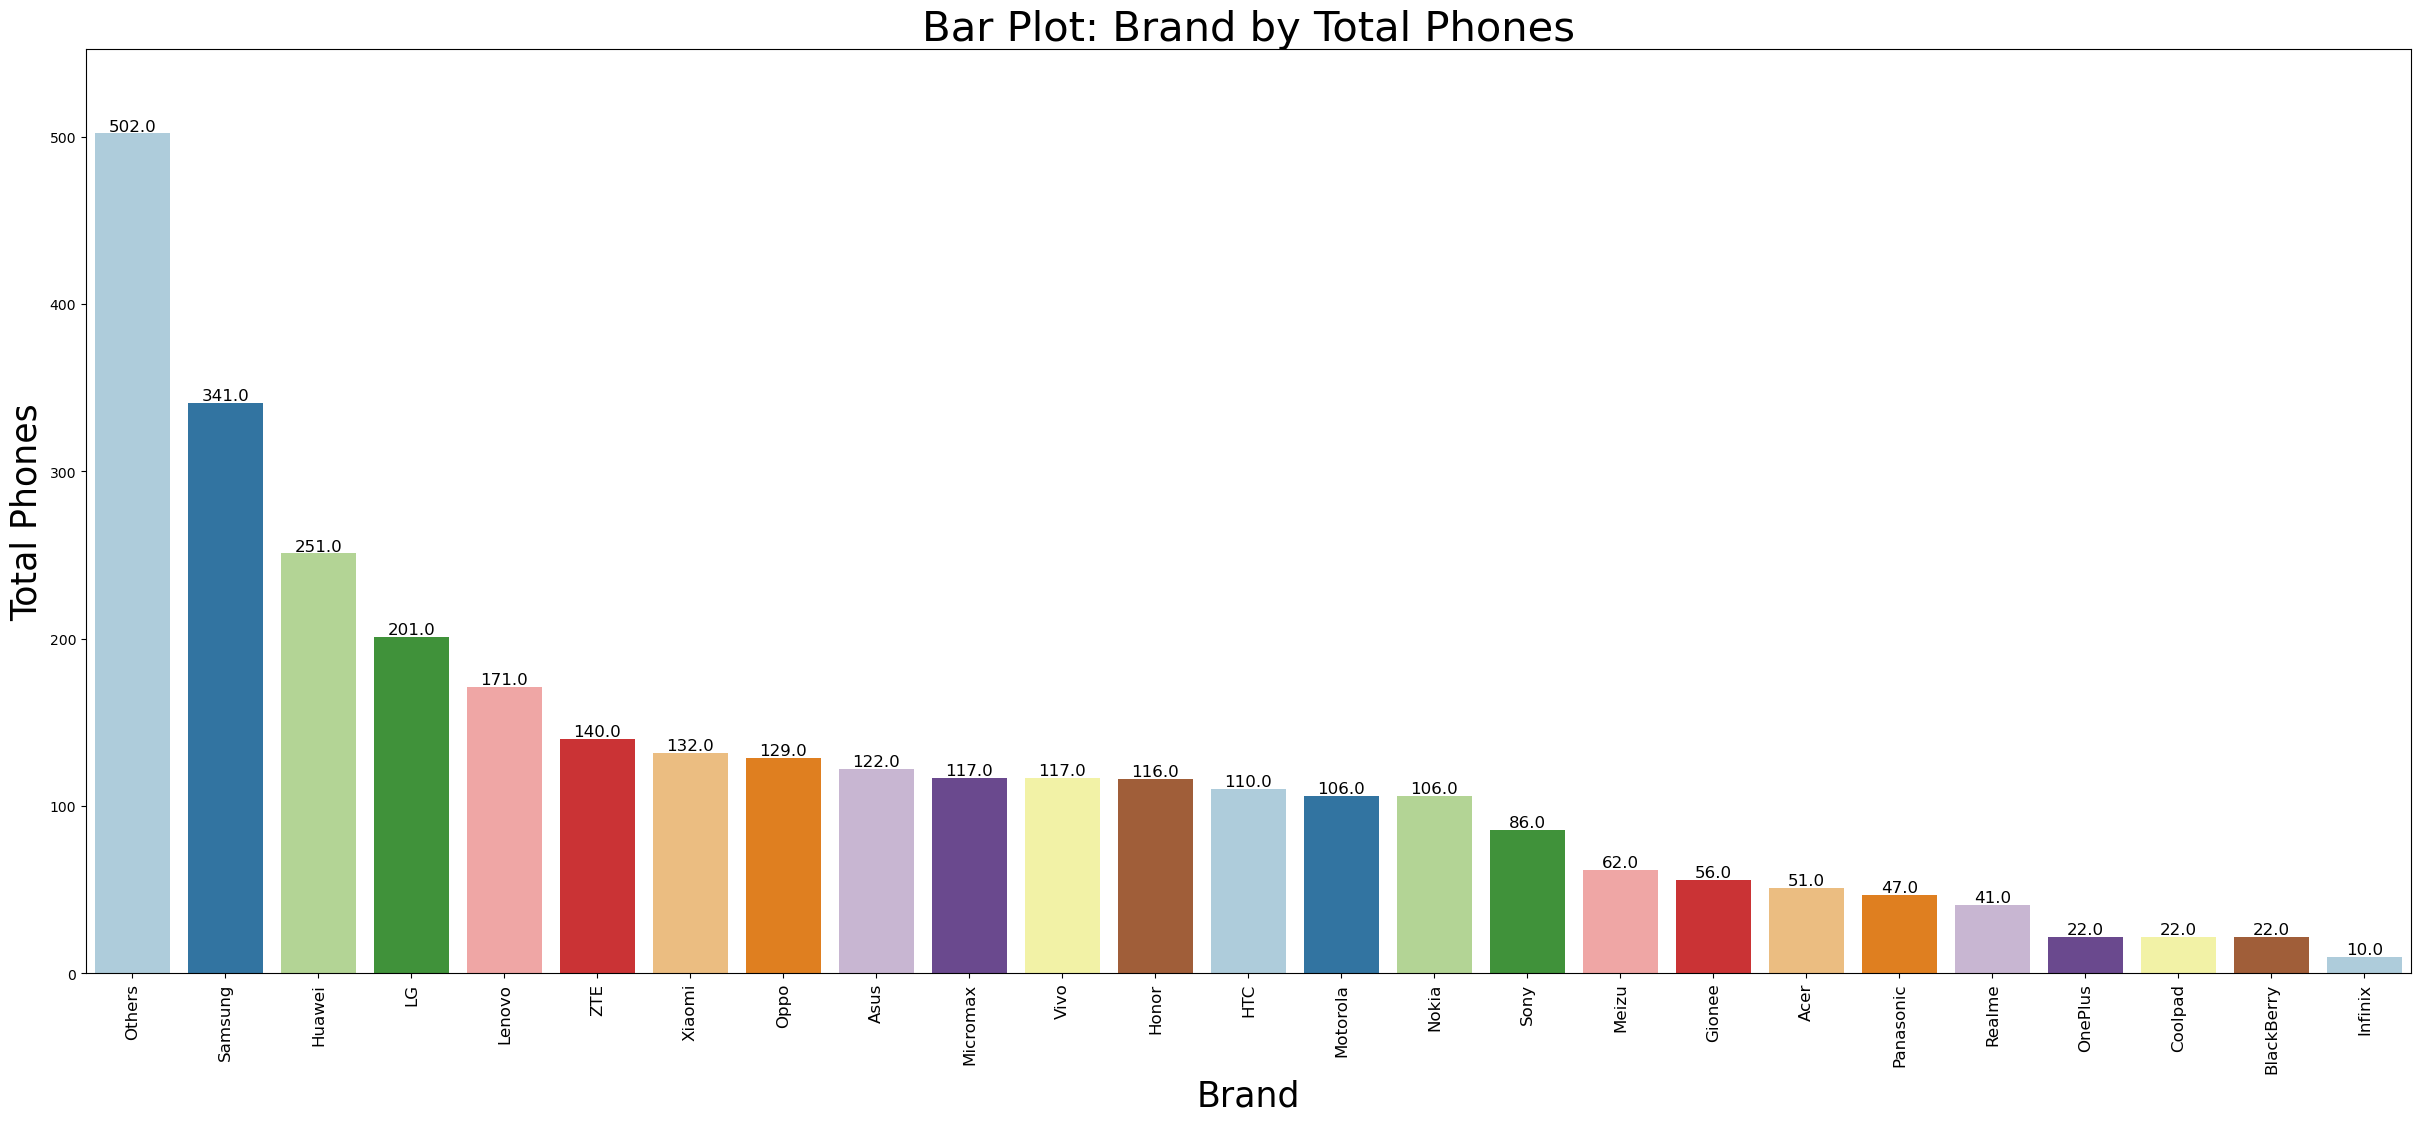

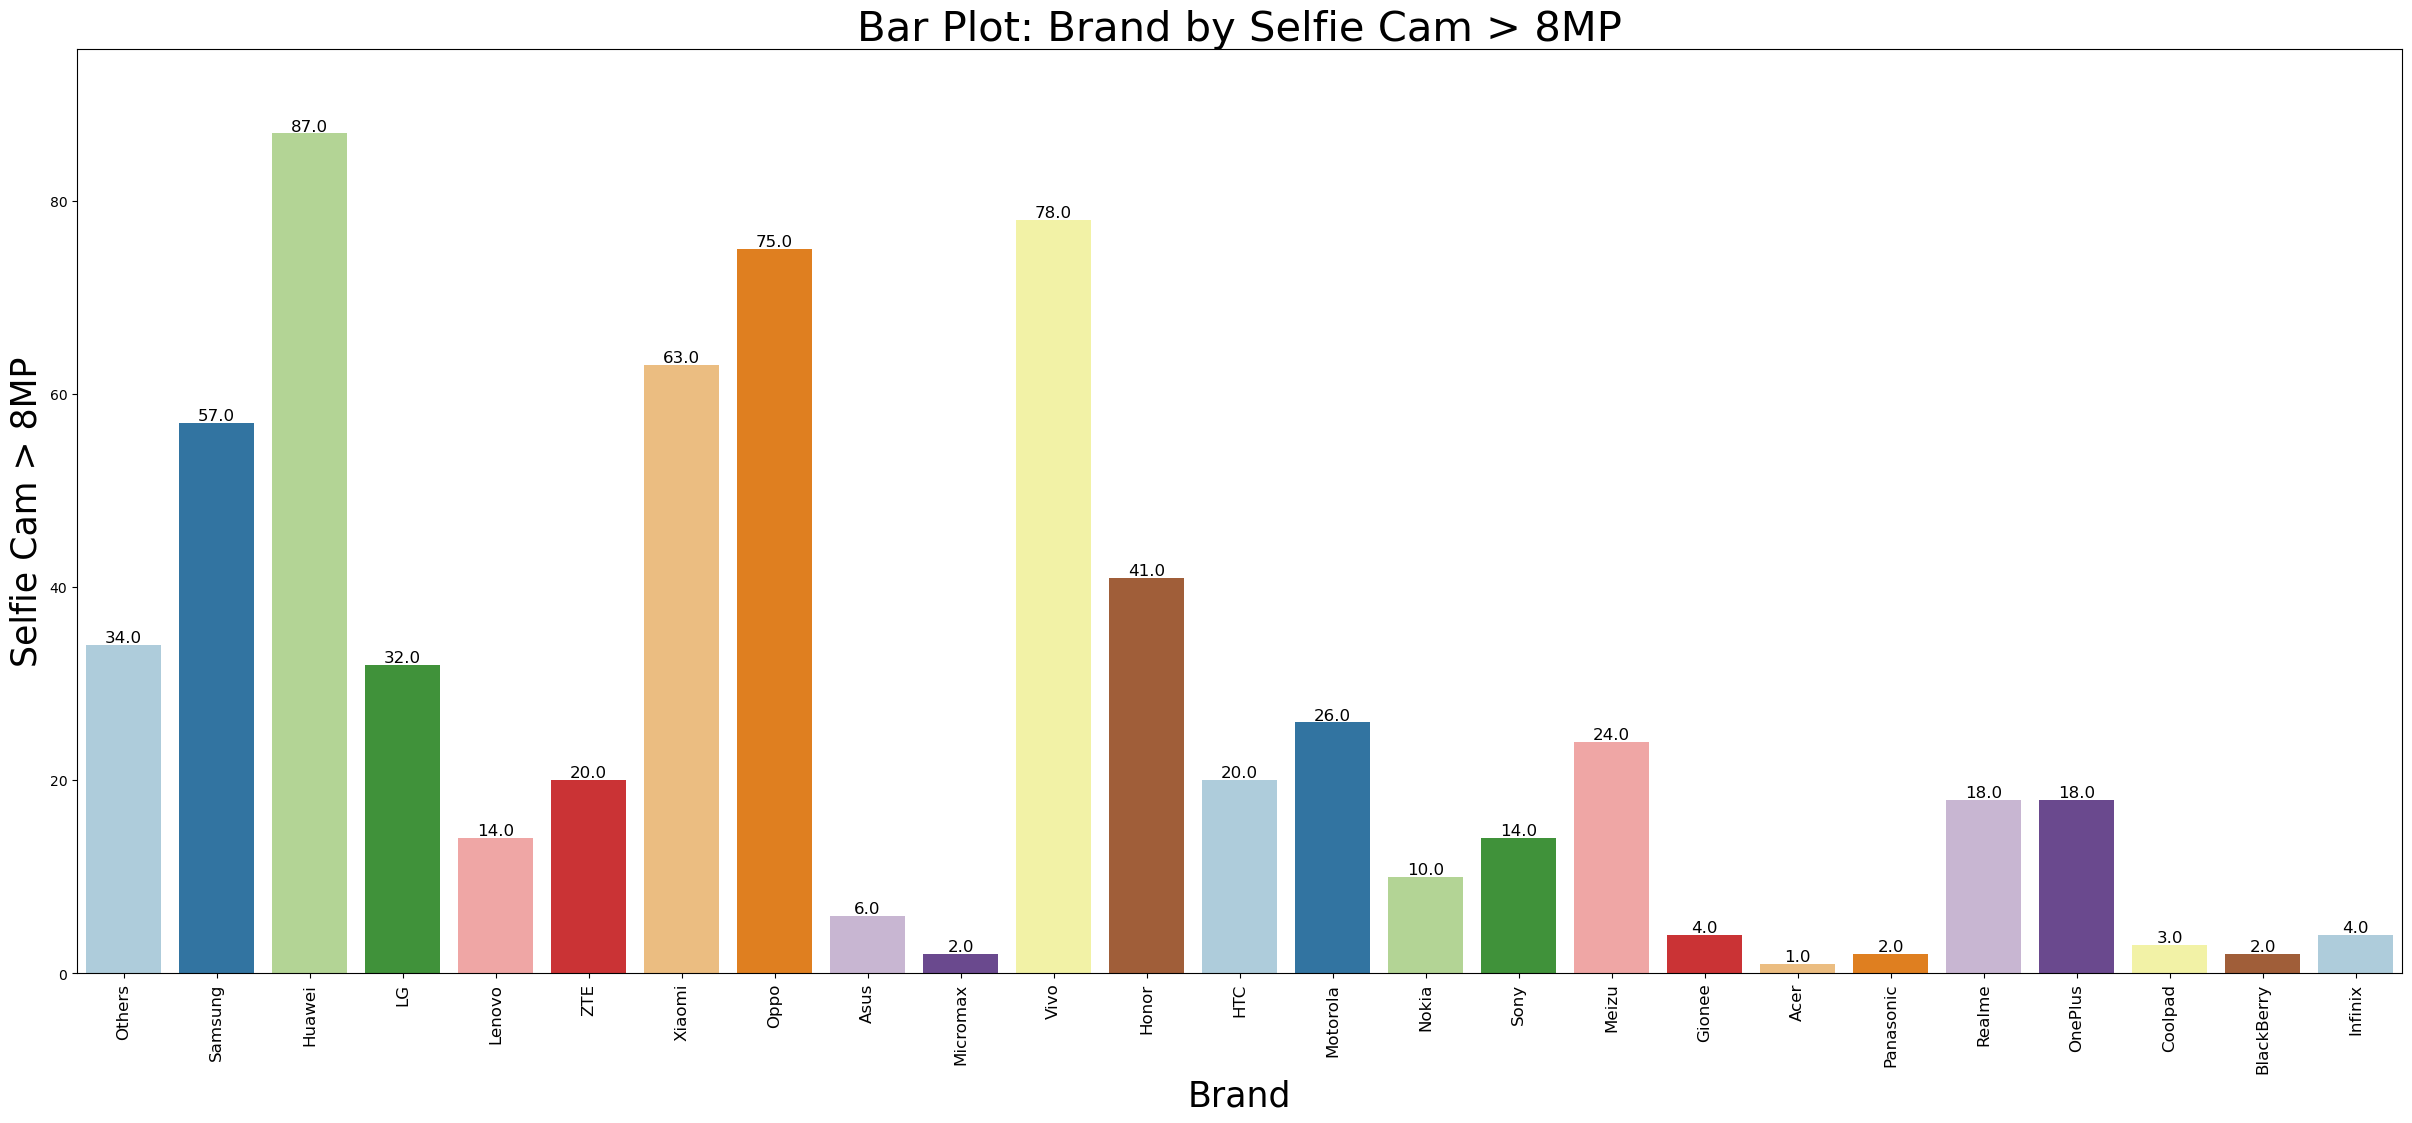

In [110]:
# run a barplot function on Total Phones and Selfie Cam against Brand
labeled_barplot(result_df1, 'Total Phones', 'Brand')
labeled_barplot(result_df1, 'Selfie Cam > 8MP', 'Brand')

#### Observations:


No changes from original EDA

## 7. Which attributes are highly correlated with the normalized price of a used device?

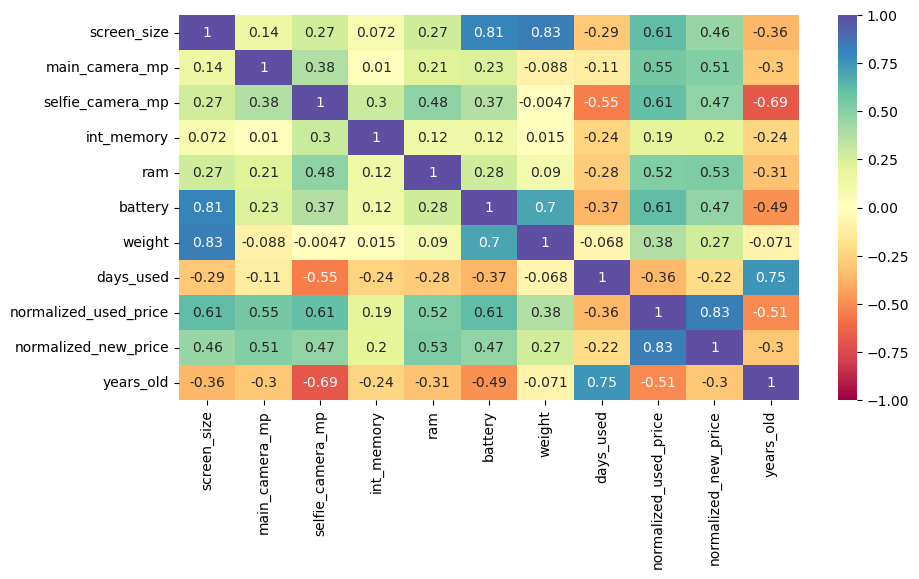

In [111]:
# create a heatmap to show the correlations between variables
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:

The only relevant change to the heatmap is that the probability of correlation between normalized_used_price and main_camera_mp decreased from 0.59 to 0.55

### Overall Observations:

Overall, there was very little change in EDA between the original and modified dataframes

### Data Preparation for Modeling

In [112]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_old  
0              4.715100          3  
1              5.519018          3  
2              5.884631          3  
3              5.630961          3  
4              4.9478

In [113]:
# add contant X
X = sm.add_constant(X)

In [114]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [115]:
# split the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [116]:
# print the number of rows in the train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [117]:
# create the first linear regression model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                           21:45:51   Log-Likelihood:                 124.29
No. Observations:                   2417   AIC:                            -150.6
Df Residuals:                       2368   BIC:                             133.1
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


1. **Adjusted. R-squared**: **0.845**

2. ***const* coefficient**: **1.3779**


## Model Performance Check

In [118]:
# function to compute adjusted R-squared
# This function comes from the MLS
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [119]:
# checking model performance on train set (seen 70% data) as seen in the MLS
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229842,0.18033,0.844942,0.841732,4.326841


In [120]:
# checking model performance on test set (seen 30% data) as seen in the MLS
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238302,0.184075,0.842552,0.834736,4.488256


#### Observations:

- The training $R^2$ is 0.85, so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting
- MAE suggests that the model can predict used phone price values within a mean error of 0.18 on the test data
- MAPE suggests that the model can predict used phone price values within a 4.49% of the price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Check for Multicollinearity

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function that checks the variance inflation factor
# this function comes from the MLS
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [122]:
# run the VIF function against the training data
checking_vif(x_train)

,feature,VIF
0,const,241.521979
1,screen_size,7.680696
2,main_camera_mp,2.139802
3,selfie_camera_mp,2.808482
4,int_memory,1.361542
5,ram,2.258249
6,battery,4.073785
7,weight,6.381335
8,days_used,2.669253
9,normalized_new_price,3.122516


In [123]:
# function that treats multicollinearity
# This function comes from the MLS
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [124]:
# define column names
col_list = ["screen_size", "weight"]
# treat multicollinearity for column names above
res = treating_multicollinearity(x_train, y_train, col_list)
# present the Adj R squared and RMSE after dropping 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838457,0.234648
1,weight,0.838185,0.234846


In [125]:
# drop screen size
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,212.810011
1,main_camera_mp,2.136866
2,selfie_camera_mp,2.805003
3,int_memory,1.359439
4,ram,2.258247
5,battery,3.835691
6,weight,2.980547
7,days_used,2.657232
8,normalized_new_price,3.080291
9,years_old,4.717488


In [126]:
# rerun linear regression model and check results
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.8
Date:                   Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                           21:45:55   Log-Likelihood:                 98.514
No. Observations:                   2417   AIC:                            -101.0
Df Residuals:                       2369   BIC:                             176.9
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [127]:
# iterate through model and incrementally remove variables based on P-value > 0.05 
# this code comes from MLS
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_old', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [128]:
# define new training and testing data based on selected features
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [129]:
# rerun the regression model
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     837.3
Date:                   Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                           21:45:56   Log-Likelihood:                 82.731
No. Observations:                   2417   AIC:                            -133.5
Df Residuals:                       2401   BIC:                            -40.82
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [130]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233828,0.182793,0.839517,0.838447,4.391838


In [131]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241209,0.185969,0.838688,0.836158,4.541121


### TEST FOR LINEARITY AND INDEPENDENCE

In [132]:
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.886289,0.201199
1525,4.448399,4.612966,-0.164566
1128,4.315353,4.302642,0.012711
3003,4.282068,4.264926,0.017142
2907,4.456438,4.464617,-0.008178


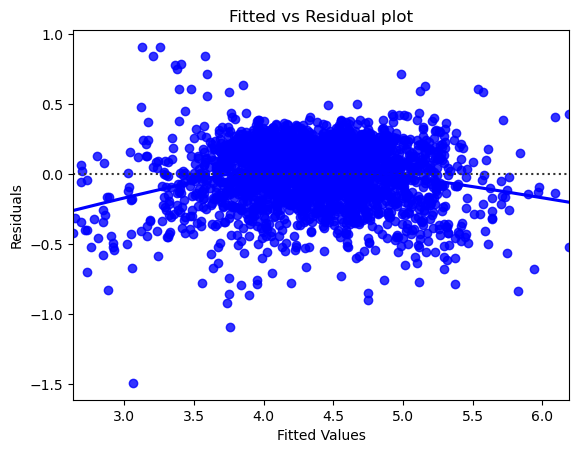

In [133]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:

There is no discernable pattern, which means the assumption of linearity and independence is satisfied

### TEST FOR NORMALITY

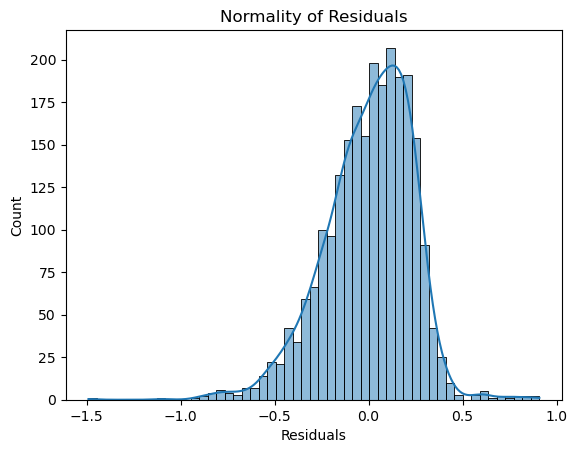

In [134]:
# create a histplot for the residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

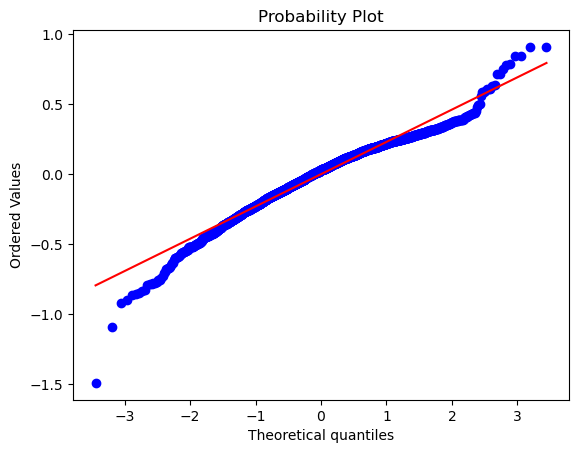

In [135]:
# create Q-Q norms graph to show normality of Residuals
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [136]:
# run a shapiro-wilkes test on residuals
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9705725908279419, pvalue=7.193158365844902e-22)

#### Observations:

While the histogram and the Q-Q test do not look absolutely normal, the p-value is far less than 0.05, so the assumption is satisfied

### TEST FOR HOMOSCEDASTICITY

In [137]:
# run a test for homoscedasticity
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.006581831881727), ('p-value', 0.45491388140653904)]

#### Observations:

Since the p-value is greater than 0.05, the assumption of Homoscedasticity is satisfied

### Predictions on test data

In [138]:
# predictions on the test set
pred = olsmod2.predict(x_test3)
# create a dataframe to present the actual and presented values
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.396986
2341,3.696103,3.983721
1913,3.592093,3.609274
688,4.306495,4.078508
650,4.522115,5.110174
2291,4.259294,4.370712
40,4.997685,5.467808
1884,3.875359,4.017039
2538,4.206631,4.039853
45,5.380450,5.301098


## Final Model

In [139]:
# create train and test copies to begin the final model
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [140]:
# run the final linear regression mode
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     837.3
Date:                   Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                           21:46:05   Log-Likelihood:                 82.731
No. Observations:                   2417   AIC:                            -133.5
Df Residuals:                       2401   BIC:                            -40.82
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [141]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233828,0.182793,0.839517,0.838447,4.391838


In [142]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241209,0.185969,0.838688,0.836158,4.541121


#### Final Equation:

normalized_used_price = 1.6151 + main_camera_mp(0.0205) + selfie_camera_mp(0.0137) + ram(0.0195) + weight(0.0017) + normalized_new_price(0.4374) + years_old(-0.0302) + brand_name_LG(-0.0431) + brand_name_Micromax(-0.050) + brand_name_Others(-0.0383) + brand_name_Samsung(-0.0513) + brand_name_Sony(-0.0687) + brand_name_Xiaomi(0.0770) + os_Others(-0.1416) + os_iOS(-0.0992) + 4g_yes(0.0458)

## Actionable Insights and Recommendations 

- The variable with the highest contribution to the dependent variable is normalized_new_price. The coefficient 0.4374 suggests that, for every 100 Euros that a new phone costs, ReCell will be able to make around 43.74 Euros. 
- Interestingly, the next highest contribution to the dependent variable comes from os_Others, which has a coefficient of -0.1416. However, because os_Others is a binary dummy variable, meaning that it can only have the value 0 or 1, it lacks the magnitude that other variables, like main_camera_mp, has. main_camera_mp has a max value of 48, which means that, even though it's coefficient is 0.0205, if the main_camera_mp value is 48, the money made from that sale will be much greater than just taking into consideration os_Others. 

- When choosing which phones to purchase from businesses or customers for resale, prioritizing main_camera_mp over self_camera_mp may bring more money into the resale as the linear regression model values the main_camera_mp higher than the self_camera_mp.
- Lastly, for future analysis, it is recommended to include the price which ReCell pays the customers or businesses from which the phone is bought to be resold. This value may give key insights on the overall net income from a sale based on the already included variables. 


___